# Supervised Learning - Foundations Project: ReCell 

## Problem Statement

### Business Context

Buying and selling used phones and tablets used to be something that happened on a handful of online marketplace sites. But the used and refurbished device market has grown considerably over the past decade, and a new IDC (International Data Corporation) forecast predicts that the used phone market would be worth \\$52.7bn by 2023 with a compound annual growth rate (CAGR) of 13.6% from 2018 to 2023. This growth can be attributed to an uptick in demand for used phones and tablets that offer considerable savings compared with new models.

Refurbished and used devices continue to provide cost-effective alternatives to both consumers and businesses that are looking to save money when purchasing one. There are plenty of other benefits associated with the used device market. Used and refurbished devices can be sold with warranties and can also be insured with proof of purchase. Third-party vendors/platforms, such as Verizon, Amazon, etc., provide attractive offers to customers for refurbished devices. Maximizing the longevity of devices through second-hand trade also reduces their environmental impact and helps in recycling and reducing waste. The impact of the COVID-19 outbreak may further boost this segment as consumers cut back on discretionary spending and buy phones and tablets only for immediate needs.

 
### Objective

The rising potential of this comparatively under-the-radar market fuels the need for an ML-based solution to develop a dynamic pricing strategy for used and refurbished devices. ReCell, a startup aiming to tap the potential in this market, has hired you as a data scientist. They want you to analyze the data provided and build a linear regression model to predict the price of a used phone/tablet and identify factors that significantly influence it.

 
### Data Description

The data contains the different attributes of used/refurbished phones and tablets. The data was collected in the year 2021. The detailed data dictionary is given below.


- brand_name: Name of manufacturing brand
- os: OS on which the device runs
- screen_size: Size of the screen in cm
- 4g: Whether 4G is available or not
- 5g: Whether 5G is available or not
- main_camera_mp: Resolution of the rear camera in megapixels
- selfie_camera_mp: Resolution of the front camera in megapixels
- int_memory: Amount of internal memory (ROM) in GB
- ram: Amount of RAM in GB
- battery: Energy capacity of the device battery in mAh
- weight: Weight of the device in grams
- release_year: Year when the device model was released
- days_used: Number of days the used/refurbished device has been used
- normalized_new_price: Normalized price of a new device of the same model in euros
- normalized_used_price: Normalized price of the used/refurbished device in euros

## Importing necessary libraries

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# to build linear regression_model using statsmodels
import statsmodels.api as sm

# to compute VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Loading the dataset

In [ ]:
#Loading the dataset into Pandas Dataframe.
#Dataset is stored in the memory of the Google Colab session until the session is terminated .
from google.colab import files
import io

try:
    uploaded
except NameError:
    uploaded = files.upload()

data = pd.read_csv(io.BytesIO(uploaded['used_device_data.csv']))


Saving used_device_data.csv to used_device_data (1).csv


## Data Overview

### Displaying the first few rows of the dataset

In [ ]:
# returns the first 5 rows
data.head()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,2020,127,4.307572,4.715100
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,2020,325,5.162097,5.519018
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,2020,162,5.111084,5.884631
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,2020,345,5.135387,5.630961
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,2020,293,4.389995,4.947837


In [ ]:
# returns the last 5 rows
data.tail()

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
3449,Asus,Android,15.34,yes,no,NaN,8.0,64.0,6.0,5000.0,190.0,2019,232,4.492337,6.483872
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,2018,541,5.037732,6.251538
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,2020,201,4.357350,4.528829
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,2020,149,4.349762,4.624188
3453,Alcatel,Android,12.83,yes,no,13.0,5.0,16.0,2.0,4000.0,168.0,2020,176,4.132122,4.279994


**Observations:**

The dataset provides information on various used or refurbished phones and tablets. 

The column 'main_camera_mp' contains missing values represented as NaN and requires missing value treatment.


### Checking the shape of the dataset

In [ ]:
# Returns the number of rows and Columns present in the data
print("There are", data.shape[0], 'rows and', data.shape[1], "columns in the given data.")

There are 3454 rows and 15 columns in the given data.


**Observations:**

The dataset contains information on 3454 rows and 15 columns.

### Checking the data types of the columns for the dataset

In [ ]:
# Use info() to print a concise summary of the DataFrame
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3275 non-null   float64
 6   selfie_camera_mp       3452 non-null   float64
 7   int_memory             3450 non-null   float64
 8   ram                    3450 non-null   float64
 9   battery                3448 non-null   float64
 10  weight                 3447 non-null   float64
 11  release_year           3454 non-null   int64  
 12  days_used              3454 non-null   int64  
 13  normalized_used_price  3454 non-null   float64
 14  normalized_new_price   3454 non-null   float64
dtypes: f

**Observations:**

we observed that it contains 2 integer data types, 4 object data types, and 9 float data types, resulting in a total of 11 numerical and 4 categorical data types.

we noticed that the count of non-null values varies for the columns 'main_camera_mp', 'selfie_camera_mp', 'int_memory', 'ram', 'battery', and 'weight', indicating the presence of missing data in these columns.

we found that the memory usage of the dataset is 404.9+ KB.

### Statistical summary of the dataset

#### Numerical summary statistics

In [ ]:
# Returns Statistical summary of the data for Numerical Datatype
data.describe(exclude=[object]).T

,count,mean,std,min,25%,50%,75%,max
screen_size,3454.0,13.713115,3.805280,5.080000,12.700000,12.830000,15.340000,30.710000
main_camera_mp,3275.0,9.460208,4.815461,0.080000,5.000000,8.000000,13.000000,48.000000
selfie_camera_mp,3452.0,6.554229,6.970372,0.000000,2.000000,5.000000,8.000000,32.000000
int_memory,3450.0,54.573099,84.972371,0.010000,16.000000,32.000000,64.000000,1024.000000
ram,3450.0,4.036122,1.365105,0.020000,4.000000,4.000000,4.000000,12.000000
battery,3448.0,3133.402697,1299.682844,500.000000,2100.000000,3000.000000,4000.000000,9720.000000
weight,3447.0,182.751871,88.413228,69.000000,142.000000,160.000000,185.000000,855.000000
release_year,3454.0,2015.965258,2.298455,2013.000000,2014.000000,2015.500000,2018.000000,2020.000000
days_used,3454.0,674.869716,248.580166,91.000000,533.500000,690.500000,868.750000,1094.000000
normalized_used_price,3454.0,4.364712,0.588914,1.536867,4.033931,4.405133,4.755700,6.619433


**Observations:**

**Screen Size (cm) :** The average screen size of the used/refurbished phones and Tablets is 13.713 cm. There is a good difference between the 25th percentile and minimum value as well as the 75th percentile and maximum value indicating outliers on both ends.
Range: 5.08 cm to 30.71 cm 

**Resolution of the rear camera (MP) :**
There are a few missing values in the column main_camera_mp and its average resolution is 9.46 megapixels. The difference between the 75th percentile and maximum resolution value is high indicating outliers. 50% of the phones have a resolution of rear camera with 5 mega pixels or less than 8 mega pixels.

**Resolution of the front camera (MP) :**
There are a few missing values in the column selfie_camera_mp and its average resolution is 6.55 megapixels. The difference between the 75th percentile and maximum resolution value is high indicating outliers.50% of the phones have a resolution of the rear camera of 5 megapixels or less than 5 mega pixels.

**Internal Memory (GB) :**
There are a few missing values in the column int_memory and its average value is
54.57 GB. The internal memory of the used/refurbished phone and Tablets ranges from 0.01  GB to 1024 GB.

**RAM (GB) :**
There are a few missing values in the column ram and its average value is
4.036 GB. RAM of the used/refurbished phone and Tablets range from 0.02  GB to 12 GB. 25th,50th and 75th percentile all have the same value of 4GB indicating 75% of the observations fall below or equal to 4GB, and the remaining 25% fall above 4GB indicating highly right-skewed distribution.

**Battery (mAh) :**
There are a few missing values in the column battery and its average value is 3133.4 mAh. The Battery range is between 500 mAh and 9270 mAh.There is a good difference between the 75th percentile and the maximum value indicating the presence of outliers.

**Release Year:**
The Release Year does not have any missing values and it ranges between 2013 and 2020. 50% of the used/refurbished phones and tablets were released on or before 2015.

**Years Used:**
The usage of used/refurbished phones has a maximum of 91 days to 1094 days.
Only 25% of the phones and tablets were used for less or equal to 533 days. 75% of them are used for longer than 533 days.

**Normalized Used Price (EUR) :**
The Average Normalized price for used/refurbished phones and Tablets is 4.364712 EUR.
The minimum price is 1.53 EUR and the maximum is 6.619 EUR.

**Normalized New Price (EUR) :**
The average normalized price for new phones and Tablets is 5.233 EUR.
The minimum price is 2.9 EUR and the maximum is 7.847 EUR.

#### Catgeorical summary statistics

In [ ]:
# Returns Statistical summary of the data for object Datatype
data.describe(exclude=[np.number]).T

,count,unique,top,freq
brand_name,3454,34,Others,502
os,3454,4,Android,3214
4g,3454,2,yes,2335
5g,3454,2,no,3302


**Observations:**

There are a total of 34 unique brands of used/refurbished phones and tablets including the category 'other' that included the values that does not fit into pre defined categories.

Used/Refurbished phones and tablets are available in 4 different OSs and Android being the common OS.

4G is available in most phones and tablets compared to 5G.


### Checking for duplicate values

In [ ]:
data.duplicated().sum()

0

**Observations:**

There are no duplicate values in the data

### Checking for missing values

In [ ]:
data.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observations:**

There are missing values in the below columns:

1. main_camera_mp     -      179
2.  selfie_camera_mp     -      2
3.  int_memory          -       4
4.  ram     -                   4
5.  battery   -                 6
6.  weight  -                   7













In [ ]:
# creating a copy of the data so that original data remains unchanged
df = data.copy()

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What does the distribution of normalized used device prices look like?
2. What percentage of the used device market is dominated by Android devices?
3. The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?
4. A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?
5. Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?
6. A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?
7. Which attributes are highly correlated with the normalized price of a used device?

**The below functions need to be defined to carry out the EDA.**

In [ ]:
def histogram_boxplot(data, feature,xlabel,ylabel,figsize=(15, 10), kde=True, bins=None,hist_edgecolor='black'):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="khaki",meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},boxprops=dict(linewidth=1, edgecolor='black'),medianprops={"color": "black"},whiskerprops={'color': 'black', 'linewidth': 1},capprops={'color': 'black', 'linewidth': 1}
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    ax_box2.set_xlabel(xlabel)
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins,color='mediumseagreen',edgecolor=hist_edgecolor
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2,color='mediumseagreen',edgecolor=hist_edgecolor
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="red", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.set_xlabel(xlabel)
    ax_hist2.set_ylabel(ylabel)

In [ ]:
# function to create labeled barplots
def labeled_barplot(data, feature, xlabel, ylabel, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))


    plt.xticks(rotation=90, fontsize=15)
    plt.yticks(fontsize=15)
    
      
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="viridis", edgecolor="black",
        order=data[feature].value_counts().index[:n],
    )
    ax.set_xlabel(xlabel, fontsize=15)
    ax.set_ylabel(ylabel, fontsize=15)

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=15,
            xytext=(0, 10),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot


In [ ]:
# Function to print the top 5 frequent values and their percentage,largest 5 values and their count, Maximum and Minimum value,Mean and Median of the column
def univariate_analysis(col, label):
    # Display the top 5 values and their percentages
    print(f"1.  The top 5 frequent {label} and their percentage")
    print(df[col].value_counts(normalize=True).nlargest(5) * 100)
    print()
    # Display the top 5 values
    print(f"2.  The Top 5 largest {label} values and their count")
    print(df[col].value_counts(normalize=True).sort_index(ascending=False).head(5)*100)
    print()
    # Display the maximum and minimum values
    print(f"3.  The Maximum of {label} is {df[col].max()}  and the Minimum of {label} is {df[col].min()} ")
    print()
    # Display the mean and median values
    print(f"4.  The Mean of {label} is {round(df[col].mean(), 2)}  and the Median of {label} is {df[col].median()} ")


**Screen Size**

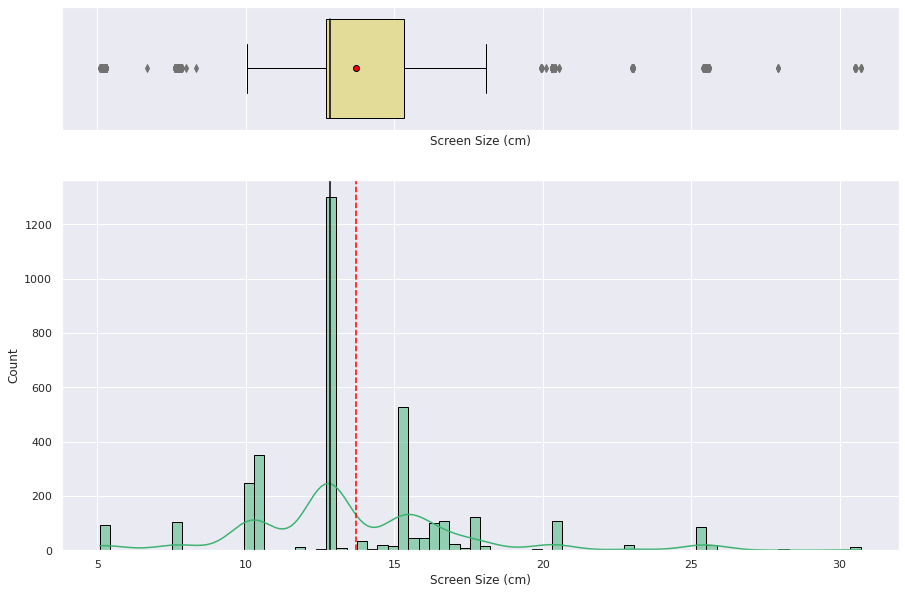

In [ ]:
histogram_boxplot(data=df,feature="screen_size",xlabel='Screen Size (cm)', ylabel='Count')

In [ ]:
univariate_analysis('screen_size', 'Screen Size(cm)')

1.  The top 5 frequent Screen Size(cm) and their percentage
12.70    16.647365
12.83    11.841343
10.29     6.340475
10.16     5.442965
15.24     3.734800
Name: screen_size, dtype: float64

2.  The Top 5 largest Screen Size(cm) values and their count
30.71    0.115808
30.56    0.028952
30.53    0.173712
27.94    0.086856
25.60    0.231616
Name: screen_size, dtype: float64

3.  The Maximum of Screen Size(cm) is 30.71  and the Minimum of Screen Size(cm) is 5.08 

4.  The Mean of Screen Size(cm) is 13.71  and the Median of Screen Size(cm) is 12.83 


**Observations:**

The screen size of the used/refurbished devices ranges from 5.08 cm to 30.71 cm.

The average screen size of the devices is 13.71 cm.

50% of the devices have a screen size of 12.83 cm or less.

**Rear Camera Resolution (megapixels)**

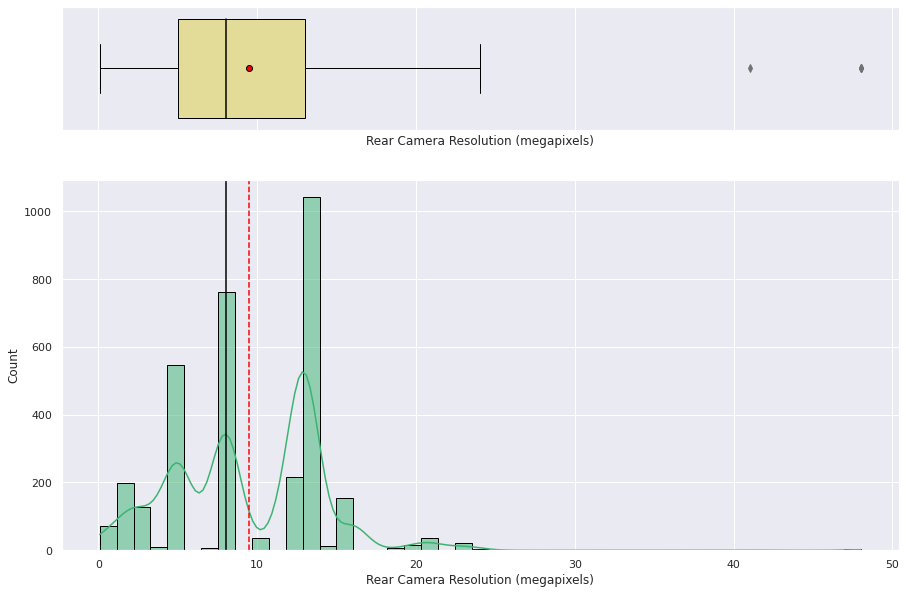

In [ ]:
histogram_boxplot(data=df,feature="main_camera_mp",xlabel='Rear Camera Resolution (megapixels)', ylabel='Count')

In [ ]:
# Call the univariate_analysis function
univariate_analysis('main_camera_mp', 'Rear Camera Resolution(MP)')

1.  The top 5 frequent Rear Camera Resolution(MP) and their percentage
13.0    31.603053
8.0     23.053435
5.0     16.671756
12.0     5.770992
2.0      5.221374
Name: main_camera_mp, dtype: float64

2.  The Top 5 largest Rear Camera Resolution(MP) values and their count
48.0    0.122137
41.0    0.030534
24.0    0.152672
23.0    0.580153
22.6    0.030534
Name: main_camera_mp, dtype: float64

3.  The Maximum of Rear Camera Resolution(MP) is 48.0  and the Minimum of Rear Camera Resolution(MP) is 0.08 

4.  The Mean of Rear Camera Resolution(MP) is 9.46  and the Median of Rear Camera Resolution(MP) is 8.0 


**Observations:**

31% of used/refurbished phones and tablets in the data have a rear camera resolution of 13 MP, followed by 8 MP, 5 MP, 12 MP, and 2 MP.

 We can observe multiple peaks corresponding to these values in the histogram.

There are a few extremely high values of 48 MP and 41 MP, resulting in outliers.

The average resolution of the rear camera is 9.5 MP and 50% of used/refurbished phones and tablets have 8 MP or less on the rear camera.

**Front Camera Resolution (megapixels)**

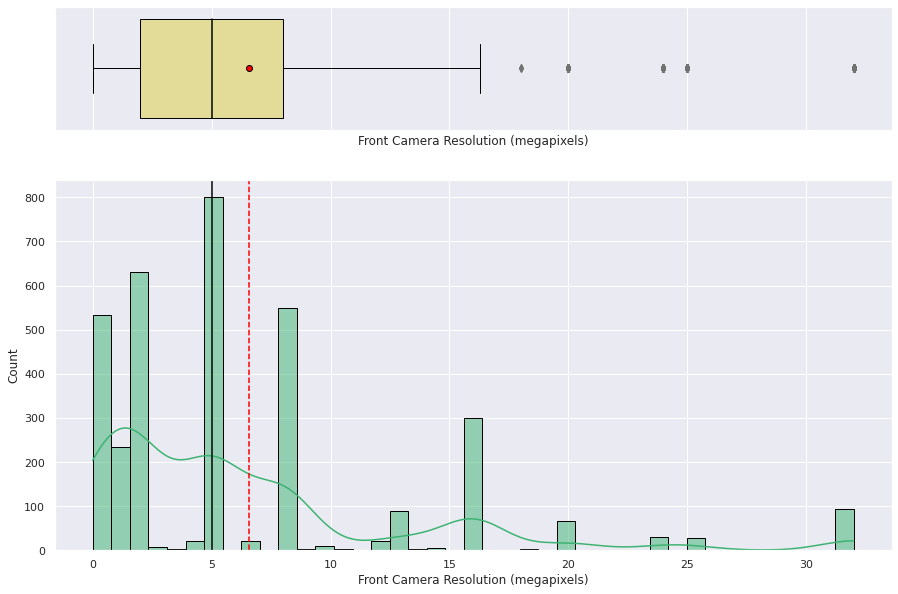

In [ ]:
histogram_boxplot(data=df,feature="selfie_camera_mp",xlabel='Front Camera Resolution (megapixels)', ylabel='Count')

In [ ]:
# Call the univariate_analysis function
univariate_analysis('selfie_camera_mp', 'Front Camera Resolution(MP)')

1.  The top 5 frequent Front Camera Resolution(MP) and their percentage
5.0     22.914253
8.0     15.903824
2.0     15.585168
0.3     14.252607
16.0     8.632677
Name: selfie_camera_mp, dtype: float64

2.  The Top 5 largest Front Camera Resolution(MP) values and their count
32.0    2.723059
25.0    0.811124
24.0    0.869061
20.0    1.940904
18.0    0.057937
Name: selfie_camera_mp, dtype: float64

3.  The Maximum of Front Camera Resolution(MP) is 32.0  and the Minimum of Front Camera Resolution(MP) is 0.0 

4.  The Mean of Front Camera Resolution(MP) is 6.55  and the Median of Front Camera Resolution(MP) is 5.0 


**Observations:**

22% of used/refurbished phones and tablets in the data have a front camera resolution of 5 MP, which is the most frequent value.

Around 2% of the phones and tablets have a front camera resolution of 32 MP, resulting in outliers.

The average resolution of the front camera is 6.55 MP and 50% of used/refurbished phones and tablets have 5 MP or less on the front camera.

**Internal Memory (GB)**

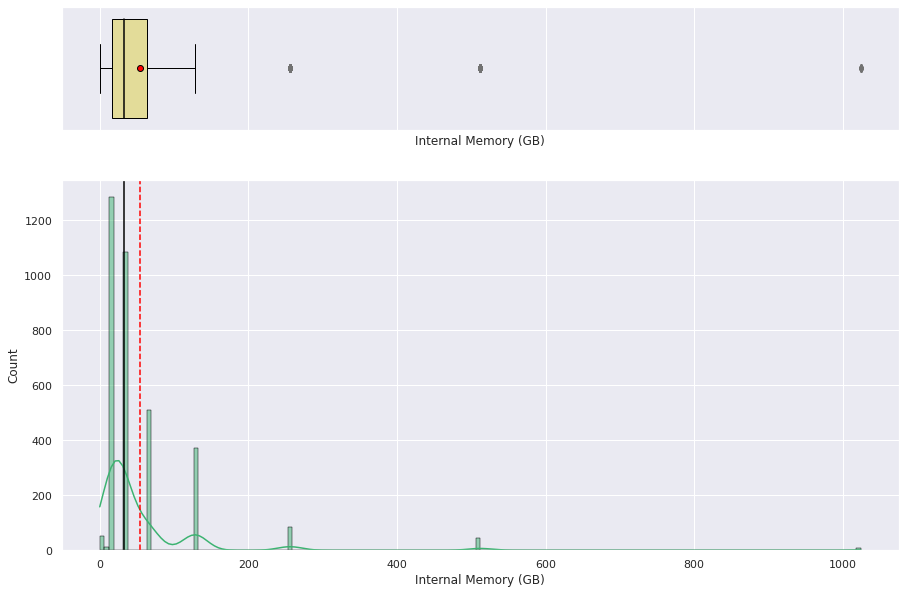

In [ ]:
histogram_boxplot(data=df,feature="int_memory",xlabel='Internal Memory (GB)', ylabel='Count')

In [ ]:
# Call the univariate_analysis function
univariate_analysis('int_memory', 'Internal Memory(GB)')

1.  The top 5 frequent Internal Memory(GB) and their percentage
16.0     37.188406
32.0     31.391304
64.0     14.753623
128.0    10.782609
256.0     2.492754
Name: int_memory, dtype: float64

2.  The Top 5 largest Internal Memory(GB) values and their count
1024.0     0.231884
512.0      1.275362
256.0      2.492754
128.0     10.782609
64.0      14.753623
Name: int_memory, dtype: float64

3.  The Maximum of Internal Memory(GB) is 1024.0  and the Minimum of Internal Memory(GB) is 0.01 

4.  The Mean of Internal Memory(GB) is 54.57  and the Median of Internal Memory(GB) is 32.0 


**Observations:**

37% of used/refurbished phones and tablets in the data have an internal memory of 16GB, which is the most frequent value.

A very small percentage of phones and tablets have high internal memory, resulting in outliers.

50% of used/refurbished phones and tablets have 32GB or less internal memory.

**RAM(GB)**

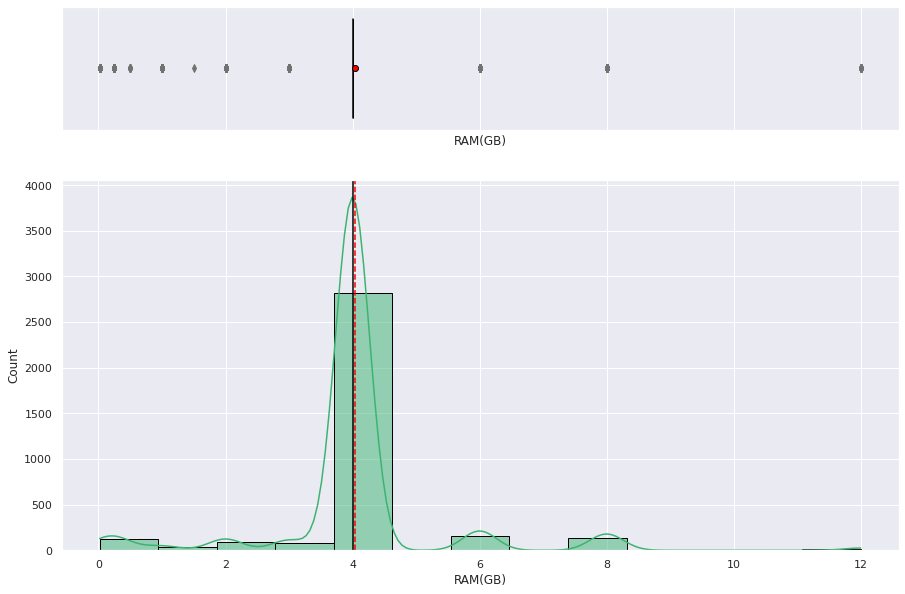

In [ ]:
histogram_boxplot(data=df,feature="ram",xlabel='RAM(GB)', ylabel='Count')

In [ ]:
# Call the univariate_analysis function
univariate_analysis('ram', 'RAM(GB)')

1.  The top 5 frequent RAM(GB) and their percentage
4.00    81.594203
6.00     4.463768
8.00     3.768116
2.00     2.608696
0.25     2.405797
Name: ram, dtype: float64

2.  The Top 5 largest RAM(GB) values and their count
12.0     0.521739
8.0      3.768116
6.0      4.463768
4.0     81.594203
3.0      2.347826
Name: ram, dtype: float64

3.  The Maximum of RAM(GB) is 12.0  and the Minimum of RAM(GB) is 0.02 

4.  The Mean of RAM(GB) is 4.04  and the Median of RAM(GB) is 4.0 


**Observations:**

81% of used/refurbished phones and tablets in the data have a RAM of 4GB, which is the most frequent value.

This indicates that the data is heavily skewed towards 4GB. As a result, the box plot has a very small box and the whiskers appear as a single line.

The outliers on both ends of the box plot could be a result of some data points with very low or very high RAM values.

These data points are classified as outliers because they fall outside of the range of typical values for the data set.

**Battery (mAh)**

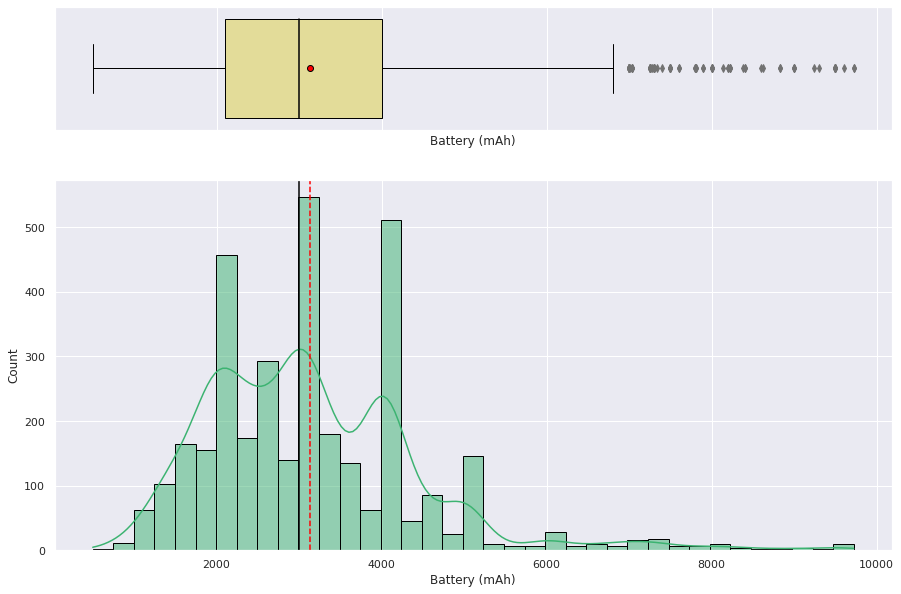

In [ ]:
histogram_boxplot(data=df,feature="battery",xlabel='Battery (mAh)', ylabel='Count')

In [ ]:
# Call the univariate_analysis function
univariate_analysis('battery', 'Battery')

1.  The top 5 frequent Battery and their percentage
4000.0    9.889791
3000.0    9.106729
2000.0    7.076566
2500.0    3.973318
2100.0    3.509281
Name: battery, dtype: float64

2.  The Top 5 largest Battery values and their count
9720.0    0.058005
9600.0    0.029002
9500.0    0.174014
9300.0    0.029002
9240.0    0.029002
Name: battery, dtype: float64

3.  The Maximum of Battery is 9720.0  and the Minimum of Battery is 500.0 

4.  The Mean of Battery is 3133.4  and the Median of Battery is 3000.0 


**Observations:**

The battery capacity of used/refurbished phones and tablets has a wide range, from 500 mAh to 9720 mAh.

 The most frequently observed battery capacities are 4000 mAh and 3000 mAh.

It can be observed that 50% of the phones and tablets have a battery capacity of 3000 mAh or less.

**Weight(grams)**

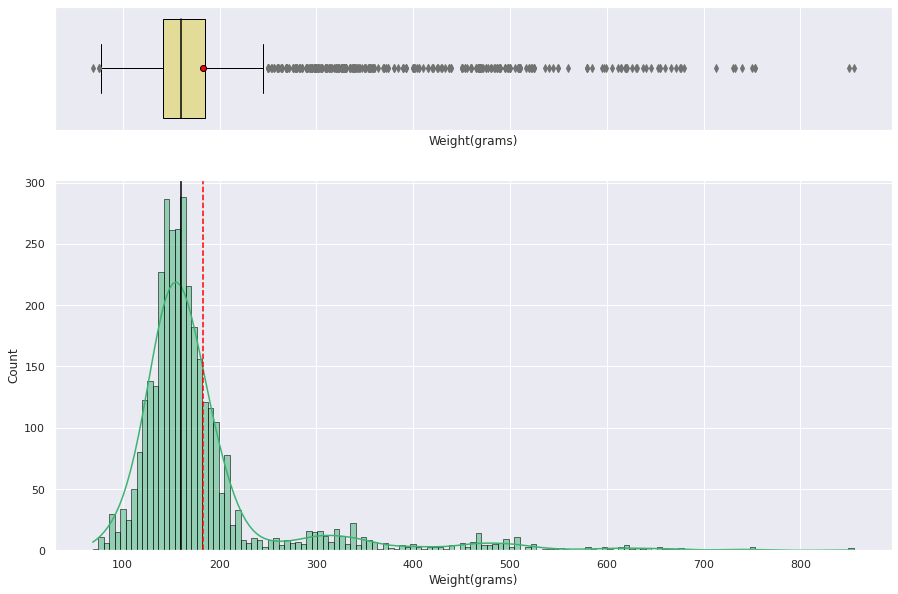

In [ ]:
histogram_boxplot(data=df,feature="weight",xlabel='Weight(grams)', ylabel='Count')

In [ ]:
# Call the univariate_analysis function
univariate_analysis('weight', 'Weight(grams)')

1.  The top 5 frequent Weight(grams) and their percentage
150.0    3.249202
140.0    2.494923
160.0    2.320859
155.0    1.972730
145.0    1.972730
Name: weight, dtype: float64

2.  The Top 5 largest Weight(grams) values and their count
855.0    0.029011
850.0    0.029011
753.0    0.058021
750.0    0.029011
740.0    0.029011
Name: weight, dtype: float64

3.  The Maximum of Weight(grams) is 855.0  and the Minimum of Weight(grams) is 69.0 

4.  The Mean of Weight(grams) is 182.75  and the Median of Weight(grams) is 160.0 


**Observations:**

The weight of used/refurbished phones and tablets ranges from 69 grams to 855 grams.

50% of the used/refurbished phones and tablets in the data weigh 160 grams or less.

There are a few heavier phones contributing to outliers in the data.

**Year of Release**

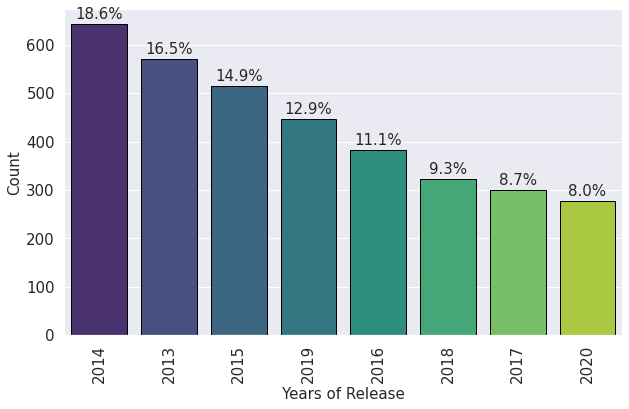

In [ ]:
labeled_barplot(data=df, feature='release_year', xlabel='Years of Release', ylabel='Count',perc=True)

**Observations:**

The used/refurbished phones and tablets in the data were manufactured during different years, ranging from 2013 to 2020.

Around 50% of the phones and tablets in the data were manufactured between 2013 and 2015.

There seems to be a higher proportion of older phones and tablets in the data compared to newer ones.

**Days Used**

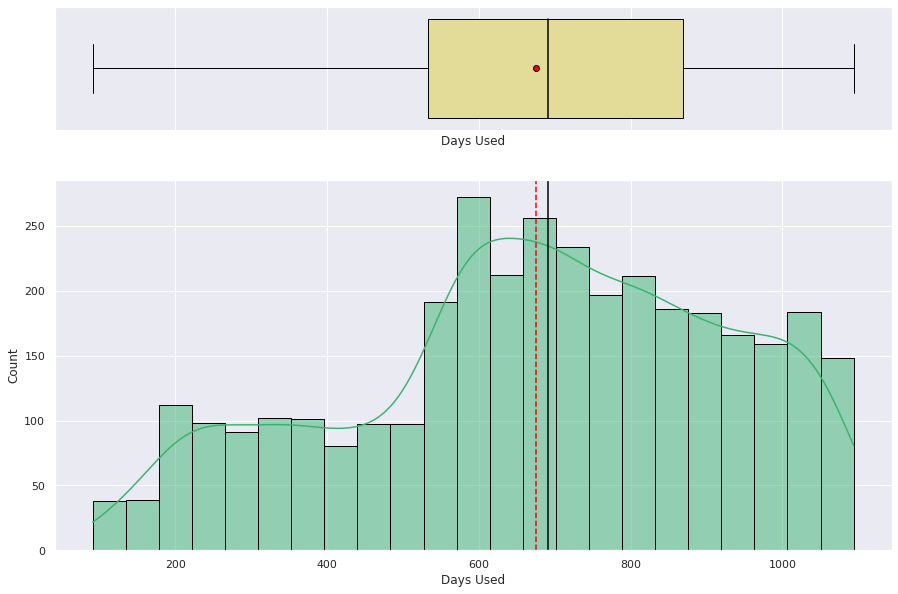

In [ ]:
histogram_boxplot(data=df,feature="days_used",xlabel='Days Used', ylabel='Count')

In [ ]:
# Call the univariate_analysis function
univariate_analysis('days_used', 'Days Used')

1.  The top 5 frequent Days Used and their percentage
578    0.376375
601    0.376375
564    0.376375
682    0.347423
683    0.347423
Name: days_used, dtype: float64

2.  The Top 5 largest Days Used values and their count
1094    0.057904
1093    0.057904
1092    0.086856
1091    0.144760
1090    0.115808
Name: days_used, dtype: float64

3.  The Maximum of Days Used is 1094  and the Minimum of Days Used is 91 

4.  The Mean of Days Used is 674.87  and the Median of Days Used is 690.5 


**Observations:**

The range of days used for the used/refurbished phones and tablets in the data is from 91 days to 1094 days.

50% of the used/refurbished phones and tablets in the data were used for 690 days or fewer.

**Normalized Used Price (EUR)**

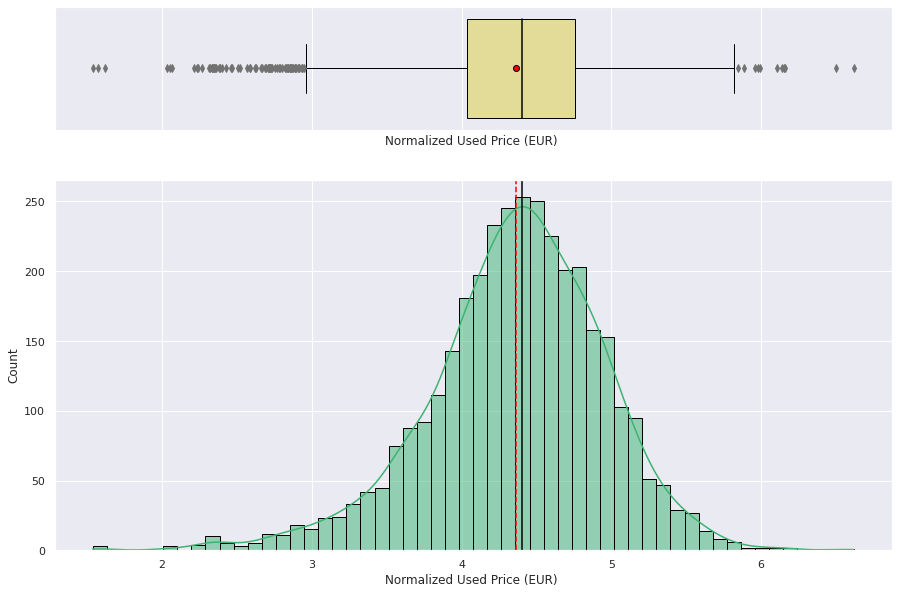

In [ ]:
histogram_boxplot(data=df,feature="normalized_used_price",xlabel='Normalized Used Price (EUR) ', ylabel='Count')

In [ ]:
# Call the univariate_analysis function
univariate_analysis('normalized_used_price', 'Normalized Used Price(EUR)')

1.  The top 5 frequent Normalized Used Price(EUR) and their percentage
4.463146    0.115808
4.065945    0.115808
4.231785    0.115808
3.535145    0.115808
4.162782    0.086856
Name: normalized_used_price, dtype: float64

2.  The Top 5 largest Normalized Used Price(EUR) values and their count
6.619433    0.028952
6.500448    0.028952
6.158969    0.028952
6.153456    0.028952
6.143348    0.028952
Name: normalized_used_price, dtype: float64

3.  The Maximum of Normalized Used Price(EUR) is 6.619433001642933  and the Minimum of Normalized Used Price(EUR) is 1.536867219599265 

4.  The Mean of Normalized Used Price(EUR) is 4.36  and the Median of Normalized Used Price(EUR) is 4.405132623388357 


**Observations:**

The range of used prices for the used/refurbished phones and tablets in the data is from 1.5 EUR to 6.6 EUR.

50% of the used/refurbished phones and tablets in the data have a used price of 4.4 EUR or less.

**Normalized New Price (EUR)**

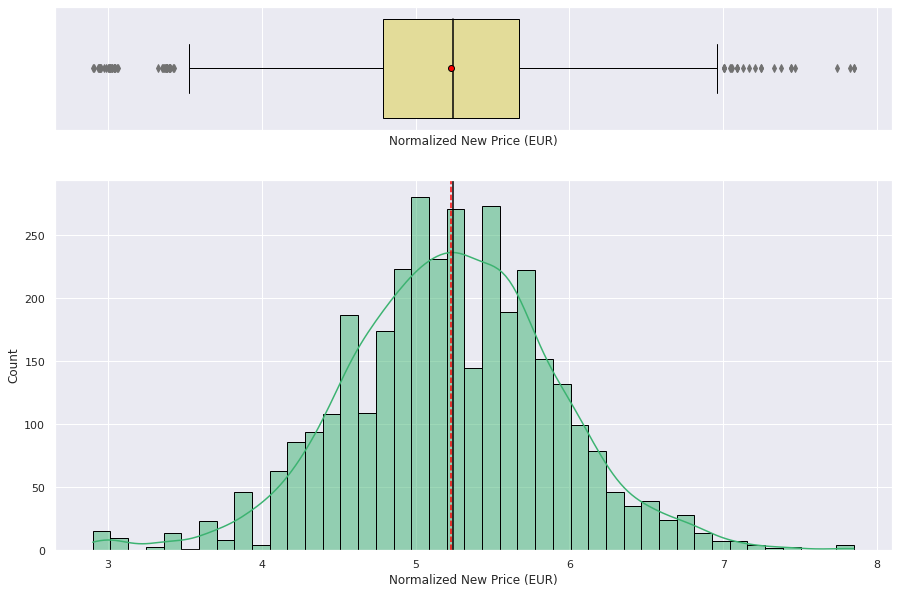

In [ ]:
histogram_boxplot(data=df,feature="normalized_new_price",xlabel='Normalized New Price (EUR)', ylabel='Count')

In [ ]:
# Call the univariate_analysis function
univariate_analysis('normalized_new_price', 'Normalized New Price(EUR)')

1.  The top 5 frequent Normalized New Price(EUR) and their percentage
5.135740    0.173712
4.779039    0.144760
5.110481    0.115808
5.299916    0.115808
5.297967    0.115808
Name: normalized_new_price, dtype: float64

2.  The Top 5 largest Normalized New Price(EUR) values and their count
7.847841    0.057904
7.823342    0.028952
7.741043    0.028952
7.468045    0.028952
7.439289    0.028952
Name: normalized_new_price, dtype: float64

3.  The Maximum of Normalized New Price(EUR) is 7.847840659422009  and the Minimum of Normalized New Price(EUR) is 2.9014215940827497 

4.  The Mean of Normalized New Price(EUR) is 5.23  and the Median of Normalized New Price(EUR) is 5.2458918493708575 


**Observations:**

The range of new prices corresponding to the used/refurbished phones and tablets in the data is from 2.9 EUR to 7.8 EUR.

50% of the new prices corresponding to the used/refurbished phones and tablets in the data are 5.2 EUR or less.

**Brand Name**

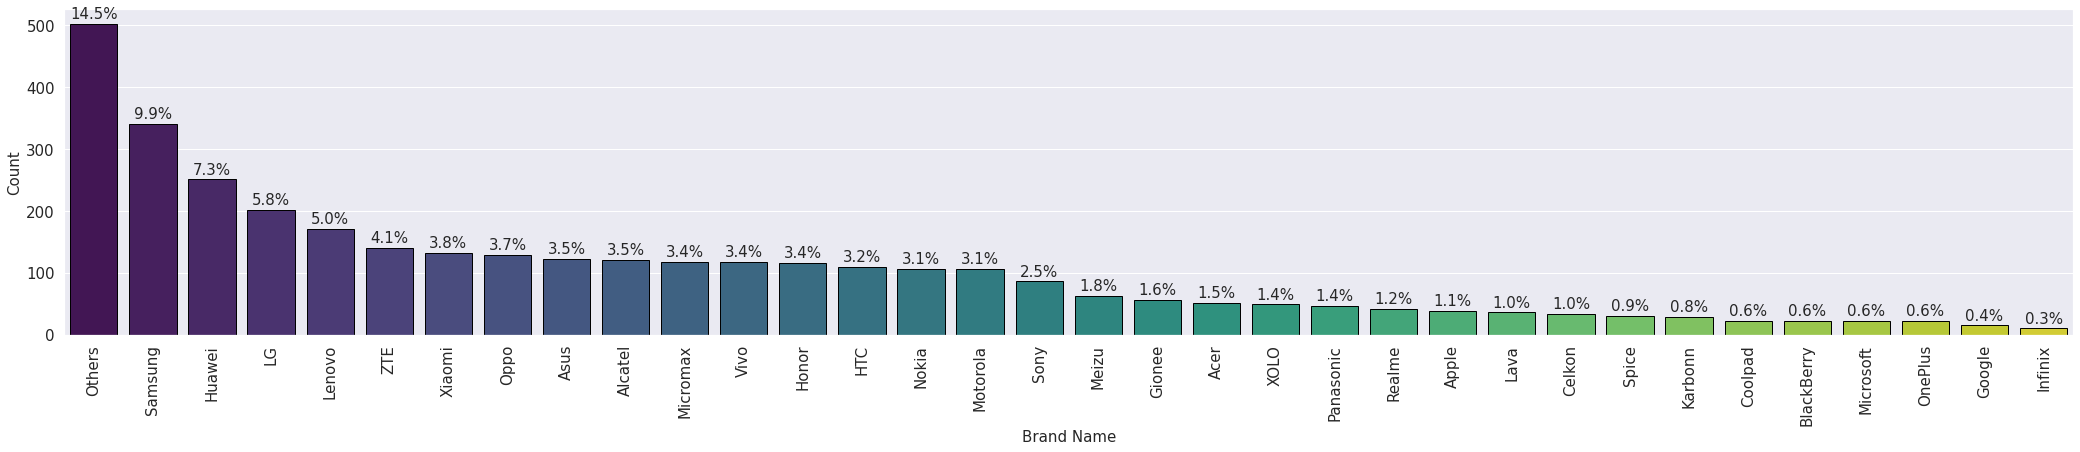

In [ ]:
labeled_barplot(data=df, feature='brand_name', xlabel='Brand Name', ylabel='Count',perc=True)


In [ ]:
df['brand_name'].value_counts(normalize=True).head(5)*100

Others     14.533874
Samsung     9.872611
Huawei      7.266937
LG          5.819340
Lenovo      4.950782
Name: brand_name, dtype: float64

**Observations:**

15% of the used/refurbished phones and tablets in the data have an unknown brand.

The most frequent brands among the identified used/refurbished phones and tablets are Samsung, accounting for 9.8% of the data, followed by Huawei with  7.2% and LG with 5.8%.



**OS Name**

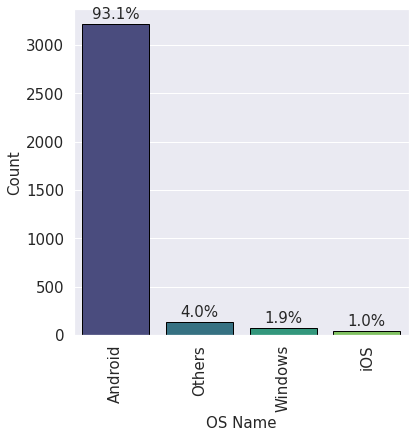

In [ ]:
labeled_barplot(data=df, feature='os', xlabel='OS Name', ylabel='Count',perc=True)


**Observations:**

Among the used/refurbished phones and tablets in the data, 93% have an Android operating system, 1.9% have Windows, 1% have iOS, and 4% have other operating systems.

The data suggests that refurbished phones and tablets with Android OS are the most common among the used/refurbished devices in the dataset.

**4G**

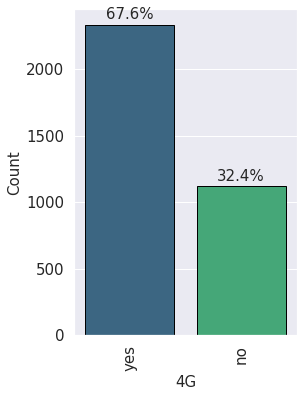

In [ ]:
labeled_barplot(data=df, feature='4g', xlabel='4G', ylabel='Count',perc=True)

**Observations:**

68% of the phones in the dataset have 4G capability, while 32% do not have 4G capability.

**5G**

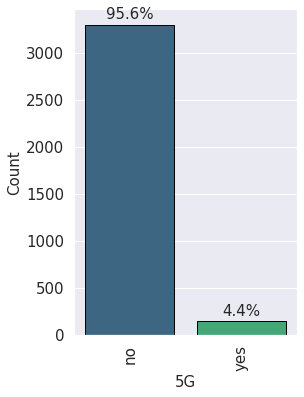

In [ ]:
labeled_barplot(data=df, feature='5g', xlabel='5G', ylabel='Count',perc=True)

**Observations:**

95.6% of the phones in the dataset does not have 5G capability, while 4.4% do  have 5G capability.

### What does the distribution of normalized used device prices look like?

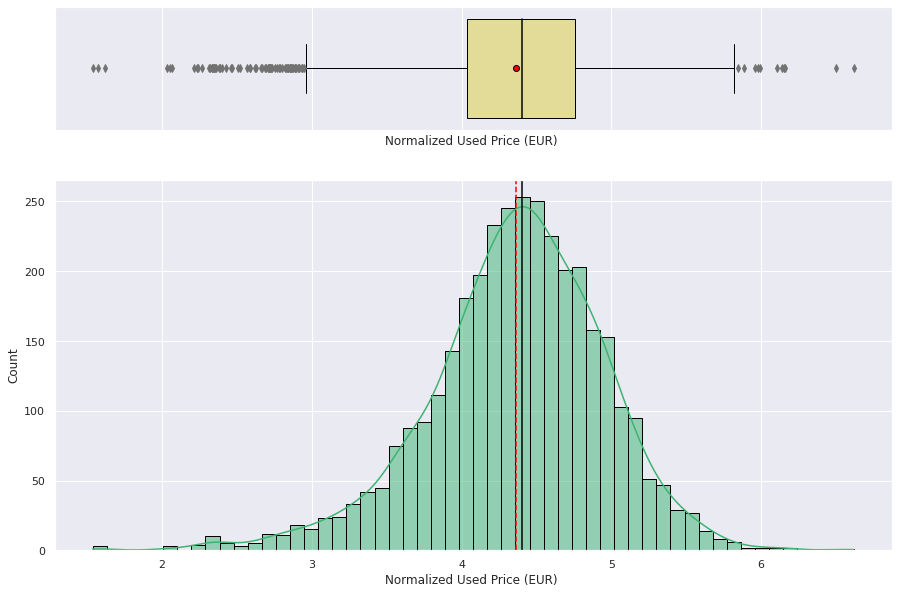

In [ ]:
histogram_boxplot(data=df,feature="normalized_used_price",xlabel='Normalized Used Price (EUR) ', ylabel='Count')

The normalized used price is normally distributed with a mean and median that are close to each other. However, there are a few extreme low and high values that constitute outliers.

### What percentage of the used device market is dominated by Android devices?

In [ ]:
percentage_android=(df[df['os']=='Android'].shape[0]/df.shape[0]*100)

In [ ]:
print('The used device market is dominated by Android devices by',round((percentage_android),2),'%')

The used device market is dominated by Android devices by 93.05 %


###The amount of RAM is important for the smooth functioning of a device. How does the amount of RAM vary with the brand?

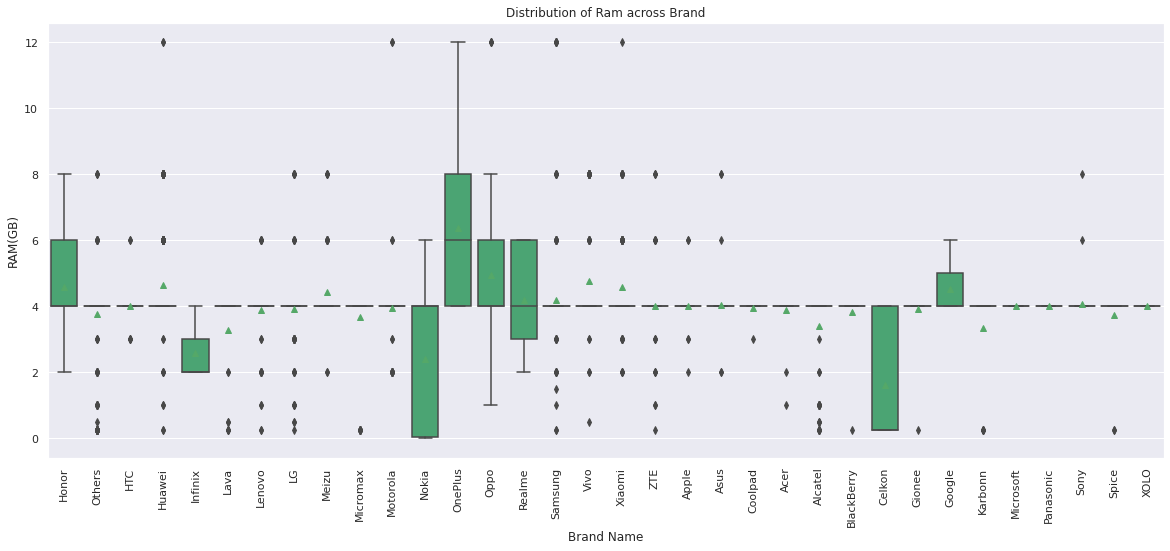

In [ ]:
plt.figure(figsize=(20, 8))
bplot=sns.boxplot(data=df, x="brand_name", y="ram",color='mediumseagreen',showmeans=True)
x1

**Observations:**

Most used and refurbished phones and tablets in the dataset have a RAM capacity of 4GB, indicating a significant skew towards this value. As a result, the box plot exhibits a small box and whiskers that appear as a single line.

The outliers on both ends of the box plot may be attributed to data points with very low or high RAM values, falling outside the range of typical values for the dataset.

Notably, some brands such as Nokia, OnePlus, Oppo, Realme, and Celkon have devices with varying RAM capacities

###A large battery often increases a device's weight, making it feel uncomfortable in the hands. How does the weight vary for phones and tablets offering large batteries (more than 4500 mAh)?

In [ ]:
df_large_battery = df[df.battery > 4500]
df_large_battery.shape

(341, 15)

In [ ]:
df_large_battery['weight'].mean()

332.2756598240469

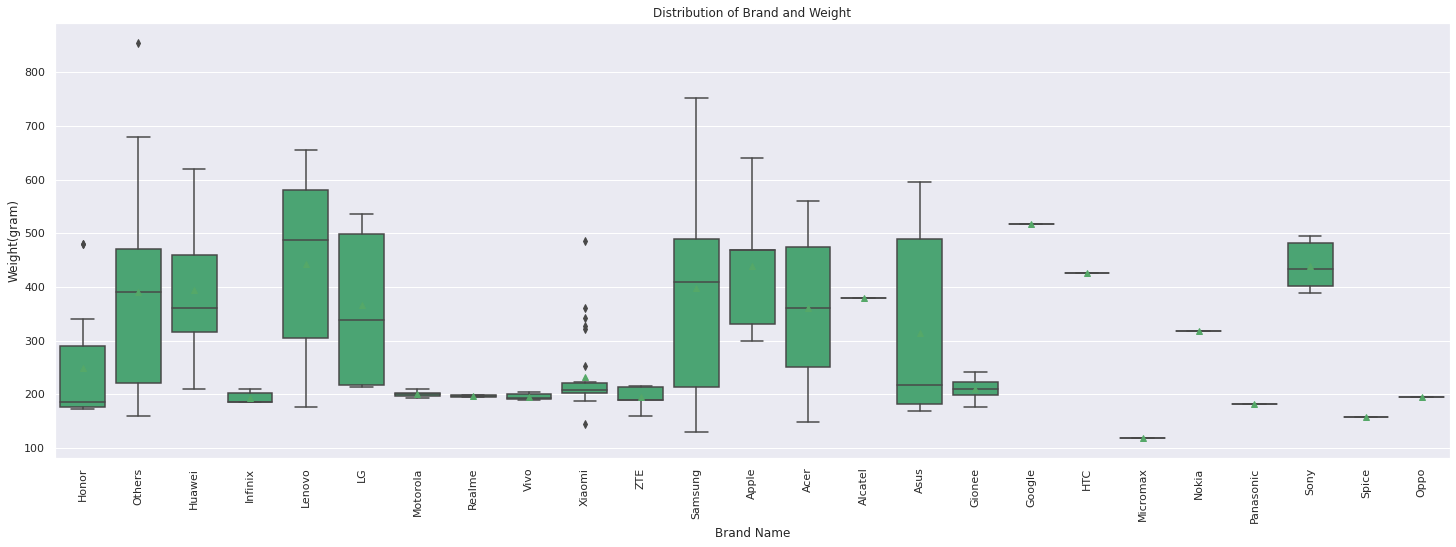

In [ ]:
plt.figure(figsize=(25, 8))
bplot=sns.boxplot(data=df_large_battery, x="brand_name", y="weight",color='mediumseagreen',showmeans=True)
bplot.set_title('Distribution of Brand and Weight')
plt.xlabel('Brand Name')
plt.ylabel('Weight(gram)')
plt.xticks(rotation=90)
plt.show()

**Observations:**

While some brands offer large battery capacities with reduced weight, the top 5 most frequently occurring brands in the dataset tend to offer large battery capacities across a wide range of device weights.

The average weight of phones with a battery capacity greater than 4500 mAh is 300 grams. Notably, the average weight of phones from the top 5 most frequent brands in the dataset is above this mean value.

###Bigger screens are desirable for entertainment purposes as they offer a better viewing experience. How many phones and tablets are available across different brands with a screen size larger than 6 inches?

In [ ]:
# Filters the data whose Screen size > 6 inch or 15.24 cm
df_large_screen = df[df.screen_size > 15.24]
df_large_screen.shape

(1099, 15)

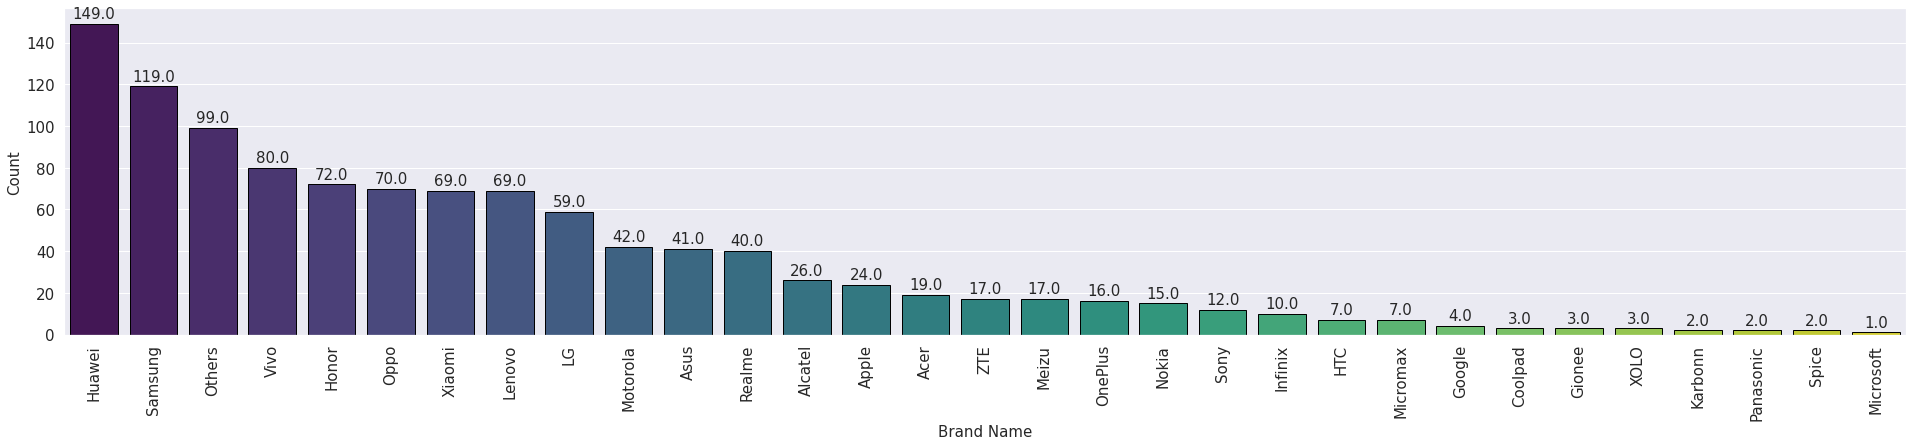

In [ ]:
labeled_barplot(data=df_large_screen, feature='brand_name', xlabel='Brand Name', ylabel='Count',perc=False)

**Observations:**

The bar plot shows the count of used/refurbished devices with a screen size greater than 6 inches for each brand.

Based on the data, the top 5 brands with the highest number of devices with a screen size greater than 6 inches are Huawei, followed by Samsung, Other Unidentified Brands, Vivo, and Honor. These brands appear to have a greater number of larger screen devices compared to the other brands in the dataset."

###A lot of devices nowadays offer great selfie cameras, allowing us to capture our favorite moments with loved ones. What is the distribution of devices offering greater than 8MP selfie cameras across brands?

In [ ]:
df_selfie_camera = df[df.selfie_camera_mp > 8]
df_selfie_camera.shape

(655, 15)

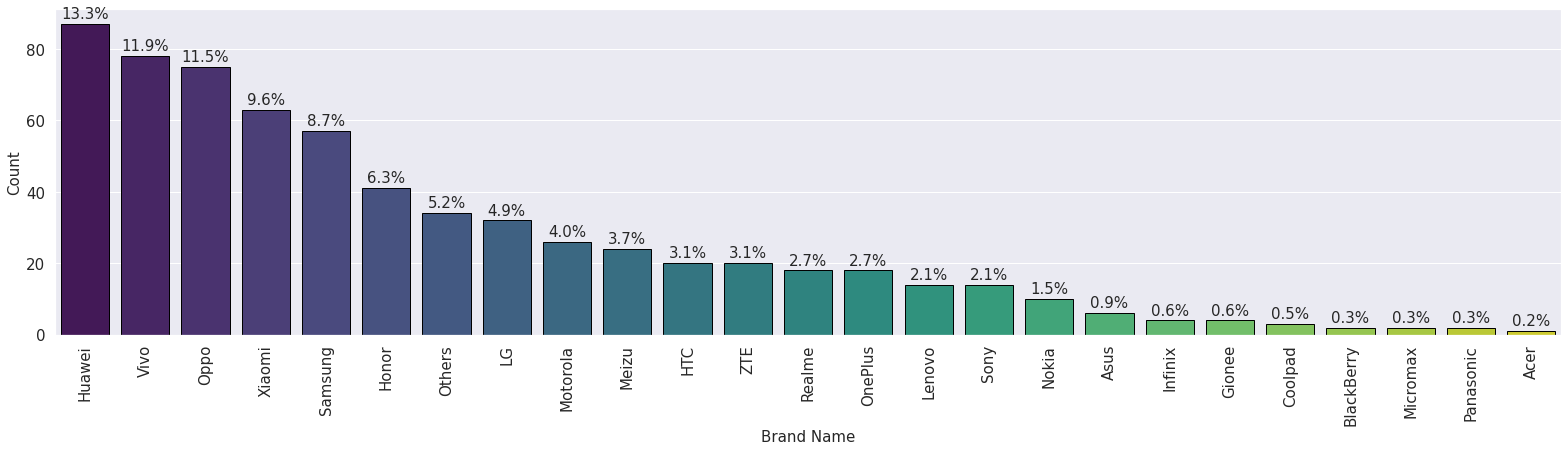

In [ ]:
labeled_barplot(data=df_selfie_camera, feature='brand_name', xlabel='Brand Name', ylabel='Count',perc=True)

**Observations:**

Based on the data, Huawei, Vivo, Oppo, Xiaomi, and Samsung are the top 5 brands that offer devices with high front camera resolutions.

Interestingly, the top 5 brands account for 55% of the total number of devices with high front camera resolutions in the dataset. This indicates that these brands have a significant presence in the market for devices with high-quality front-facing cameras

In [ ]:
df_main_camera = df[df.main_camera_mp > 16]
df_main_camera.shape

(94, 15)

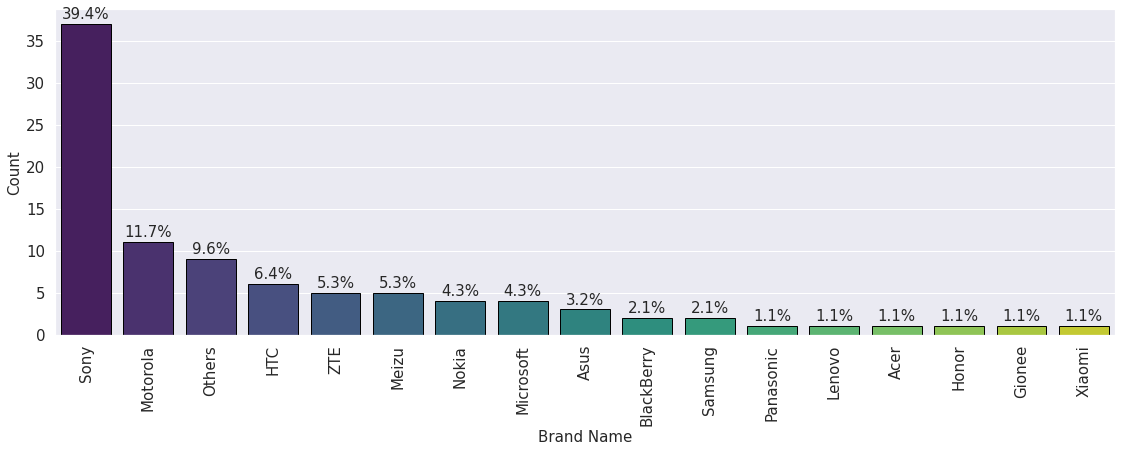

In [ ]:
labeled_barplot(data=df_main_camera, feature='brand_name', xlabel='Brand Name', ylabel='Count',perc=True)

**Observations:**

According to the data, Sony is the brand with the highest percentage of devices that have a main camera resolution higher than 16 MP, with 39% of the devices in the dataset belonging to this brand.

This suggests that Sony is a major player in the market for devices with high-quality main cameras.


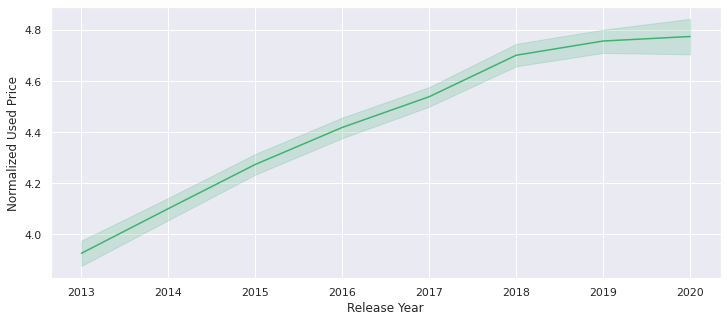

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 5))

# Plot the line graph
sns.lineplot(data=df, x='release_year', y='normalized_used_price', color='mediumseagreen')

# Set the x-axis and y-axis labels
plt.xlabel('Release Year', fontsize=12)
plt.ylabel('Normalized Used Price', fontsize=12)

# Show the plot
plt.show()

The distribution shows that the price of used/refurbished devices increased over the years.

###Which attributes are highly correlated with the normalized price of a used device?

**Heat Map and Correlation Table**

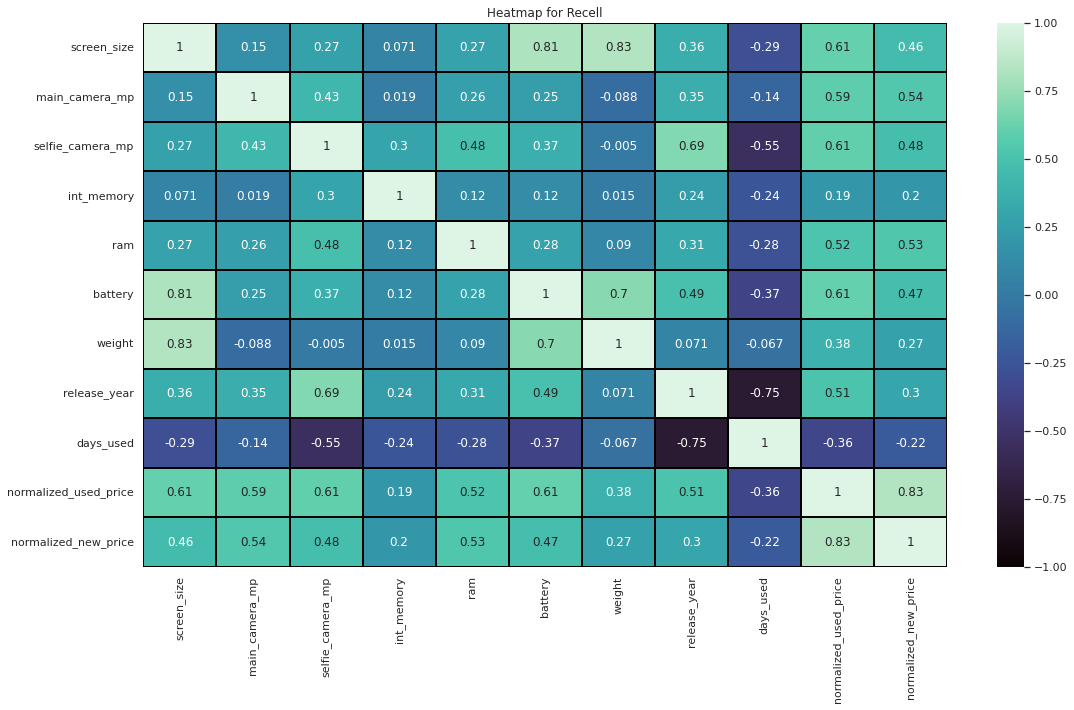

In [ ]:
plt.figure(figsize=(18,10))
hmap=sns.heatmap(df.corr(),annot=True,cmap='mako',vmin=-1,vmax=1,linecolor='black',linewidths=2);
hmap.set_title('Heatmap for Recell')
plt.show()

In [ ]:
import pandas as pd
import numpy as np

# calculate the correlation matrix
corr_matrix = df.corr()

# define the colors and ranges
color_map = {'lightgray': 'background-color:lightgray',
             'lightcoral': 'background-color:lightcoral',
             'yellowgreen': 'background-color:yellowgreen',
             'firebrick': 'background-color:firebrick',
             'forestgreen': 'background-color:forestgreen',
             'snow': 'background-color:snow'}

ranges = [(-1.0, -0.99, 'snow'),
          (-0.99, -0.7, 'firebrick'),
          (-0.7, -0.5, 'lightcoral'),
          (-0.5, 0.5, 'lightgray'),
          (0.5, 0.7, 'yellowgreen'),
          (0.7, 0.99, 'forestgreen'),
          (0.99, 1.0, 'snow')]

# create a function to apply the colors based on the value
def apply_color(val):
    for r in ranges:
        if r[0] <= val <= r[1]:
            return color_map[r[2]]
    return ''

# create a color-coded table
corr_table = corr_matrix.style.applymap(apply_color)

# Add Table border
corr_table.set_table_styles([{'selector': 'th',
                              'props': [('border', '1.5px solid black')]},
                             {'selector': 'td',
                              'props': [('border', '1.5px solid black')]}])
# Set table caption
corr_table.set_caption('Correlation Matrix for Recell with color codes for correlation')

# display the table
corr_table



,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,release_year,days_used,normalized_used_price,normalized_new_price
screen_size,1.000000,0.150316,0.271640,0.071291,0.274449,0.813533,0.828890,0.364223,-0.291723,0.614785,0.460889
main_camera_mp,0.150316,1.000000,0.429264,0.018766,0.260802,0.248563,-0.087738,0.353728,-0.144672,0.587302,0.541655
selfie_camera_mp,0.271640,0.429264,1.000000,0.296426,0.477411,0.369709,-0.004997,0.690942,-0.552636,0.608074,0.475479
int_memory,0.071291,0.018766,0.296426,1.000000,0.122496,0.117736,0.014948,0.235429,-0.242712,0.190993,0.195992
ram,0.274449,0.260802,0.477411,0.122496,1.000000,0.280740,0.089916,0.314203,-0.280066,0.520289,0.532056
battery,0.813533,0.248563,0.369709,0.117736,0.280740,1.000000,0.703388,0.488660,-0.370895,0.613619,0.470754
weight,0.828890,-0.087738,-0.004997,0.014948,0.089916,0.703388,1.000000,0.071290,-0.067470,0.382354,0.269540
release_year,0.364223,0.353728,0.690942,0.235429,0.314203,0.488660,0.071290,1.000000,-0.750390,0.509790,0.303689
days_used,-0.291723,-0.144672,-0.552636,-0.242712,-0.280066,-0.370895,-0.067470,-0.750390,1.000000,-0.358264,-0.216625
normalized_used_price,0.614785,0.587302,0.608074,0.190993,0.520289,0.613619,0.382354,0.509790,-0.358264,1.000000,0.834496


**Observations:**

The dark shades of green and red in the correlation table represent strong positive correlation and strong negative correlation respectively, while the lighter shades of green and red represent moderate positive correlation and moderate negative correlation respectively.

**Screen size** has a strong positive correlation with battery and weight, and a moderate positive correlation with normalized new price.

**Rear camera resolution** has a moderate positive correlation with normalized new price and normalized old price.

**Front camera resolution** has a moderate positive correlation with release year and normalized used price, but a moderate negative correlation with days used.

**Internal memory** shows no correlation with any variables.

**RAM** has a moderate positive correlation with normalized used price and normalized new price.

**Battery** has a strong positive correlation with screen size and weight, and a moderate positive correlation with normalized used price.

**Weight** has a strong positive correlation with battery and screen size, and a moderate positive correlation with normalized used price.

**Release year** has a moderate positive correlation with front camera resolution and normalized used price, but a strong negative correlation with days used.

**Days used** has a strong negative correlation with release year and a moderate negative correlation with front camera resolution.

The target variable, **normalized used price**, has a strong positive correlation with normalized new price, and a moderate positive correlation with screen size, front camera resolution, rear camera resolution, RAM, battery, and release year.

**Normalized new price** has a very strong positive correlation with normalized used price, and a moderate positive correlation with RAM and rear camera resolution.

**Multivariate Analysis**

In [ ]:
#Function to create pairplot to compare numerical columns
import seaborn as sns
import matplotlib.pyplot as plt

# Set the color palette
my_palette = sns.color_palette('vlag')
sns.set_palette(my_palette)

def plot_pairplot(df, col, title):
    """
    Creates a pairplot with edge colors using a custom plotting function.
    
    Parameters:
    df (pandas.DataFrame): the dataframe containing the data
    col (list of str): the columns to plot
    title (str): the title of the plot
    
    Returns:
    None
    """
    # Define a custom plotting function to add edge color
    def add_edgecolor(x, y, **kwargs):
        ax = plt.gca()
        ax.scatter(x, y, edgecolor='black', **kwargs)

    # Create the pairplot with a larger size
    pplot = sns.pairplot(data=df[col], corner=True, kind='reg', diag_kind='kde',height=5, aspect=1.5)

    # Add edge color to the scatter plot points using the custom plotting function
    pplot.map_offdiag(add_edgecolor)

    # Set the plot title
    pplot.fig.suptitle(title, y=1.05)

    # Show the plot
    plt.show()


**Multivariate Analysis - Strong Positive Correlation**

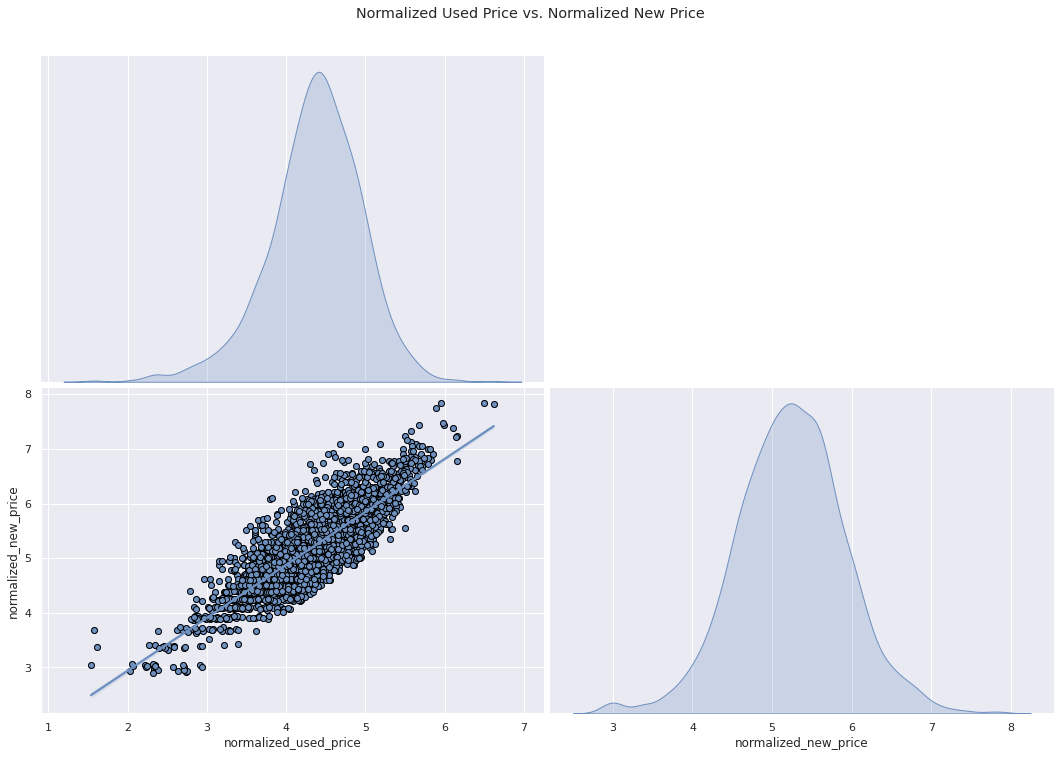

In [ ]:
plot_pairplot(df, ['normalized_used_price', 'normalized_new_price'], 'Normalized Used Price vs. Normalized New Price')


**Observations:**

Based on the pair plot analysis of the normalized new price and the normalized old price, we observed a strong positive correlation between these variables. 


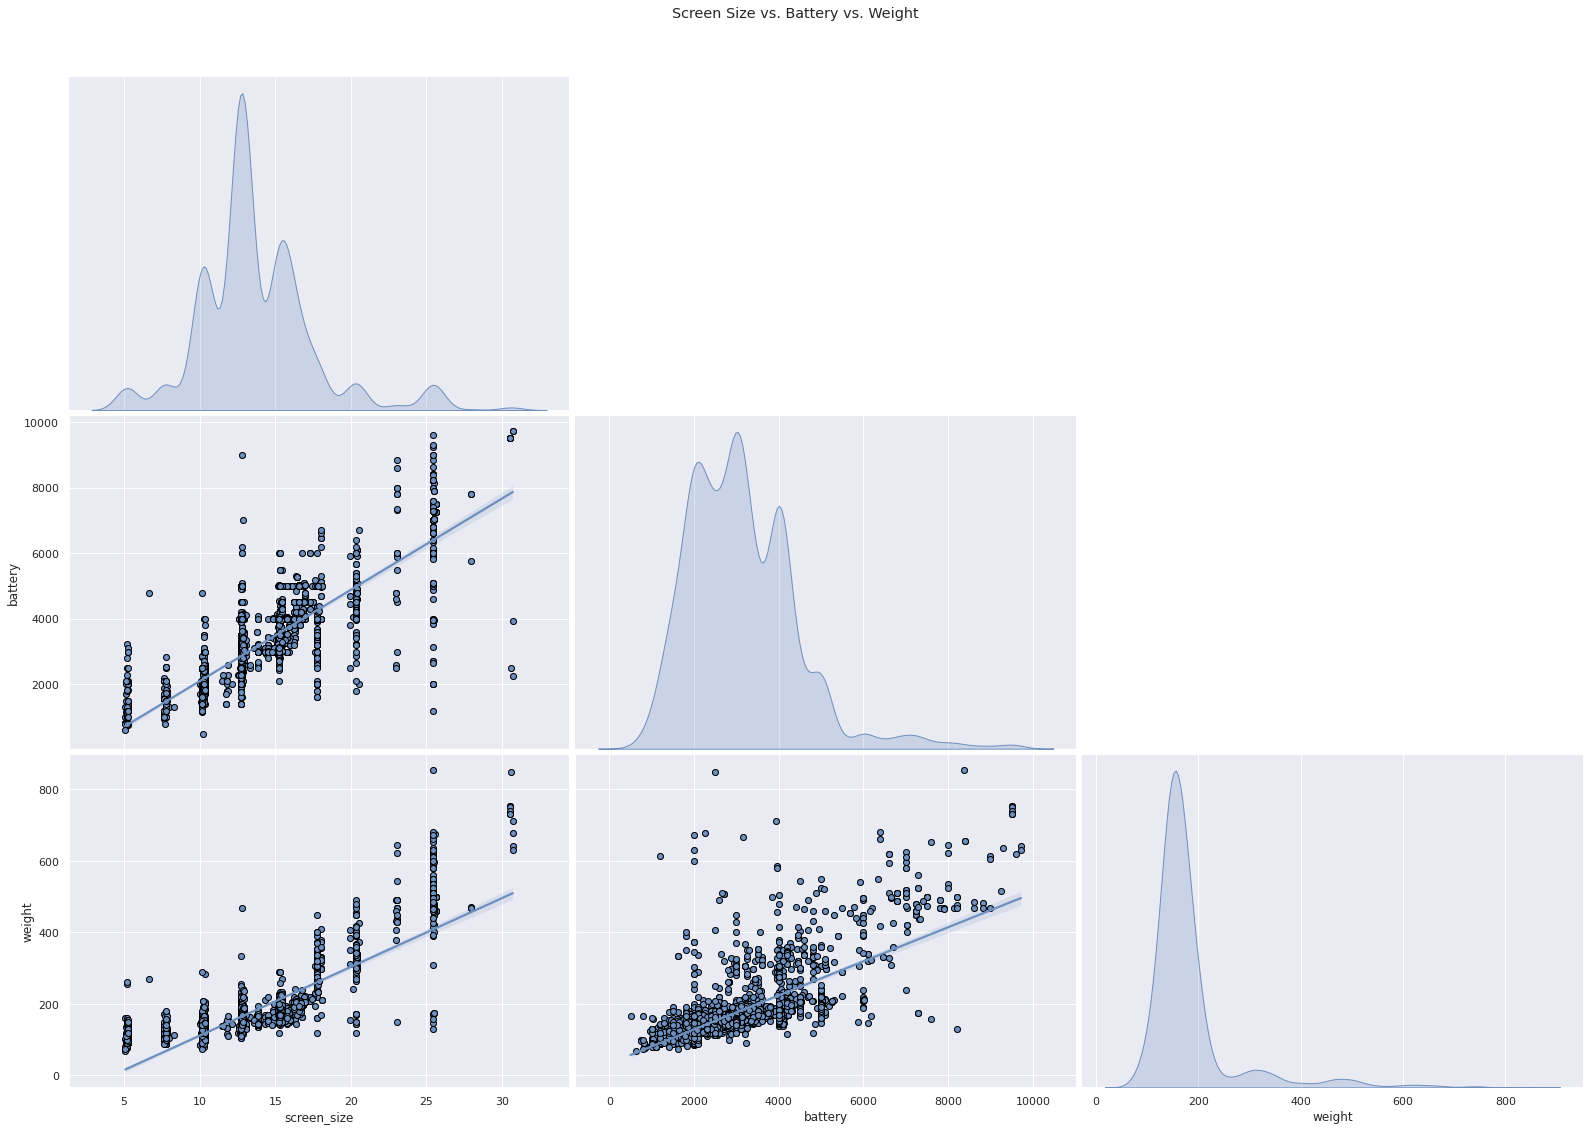

In [ ]:
plot_pairplot(df, ['screen_size', 'battery','weight'], 'Screen Size vs. Battery vs. Weight')

**Observations:**

From the pairplot analysis between screen size, weight, and battery, we observed a strong positive correlation between these variables. 

This suggests that as the screen size and weight of a device increase, so does its battery size or capacity. 

**Multivariate Analysis - Strong  Negative Correlation**

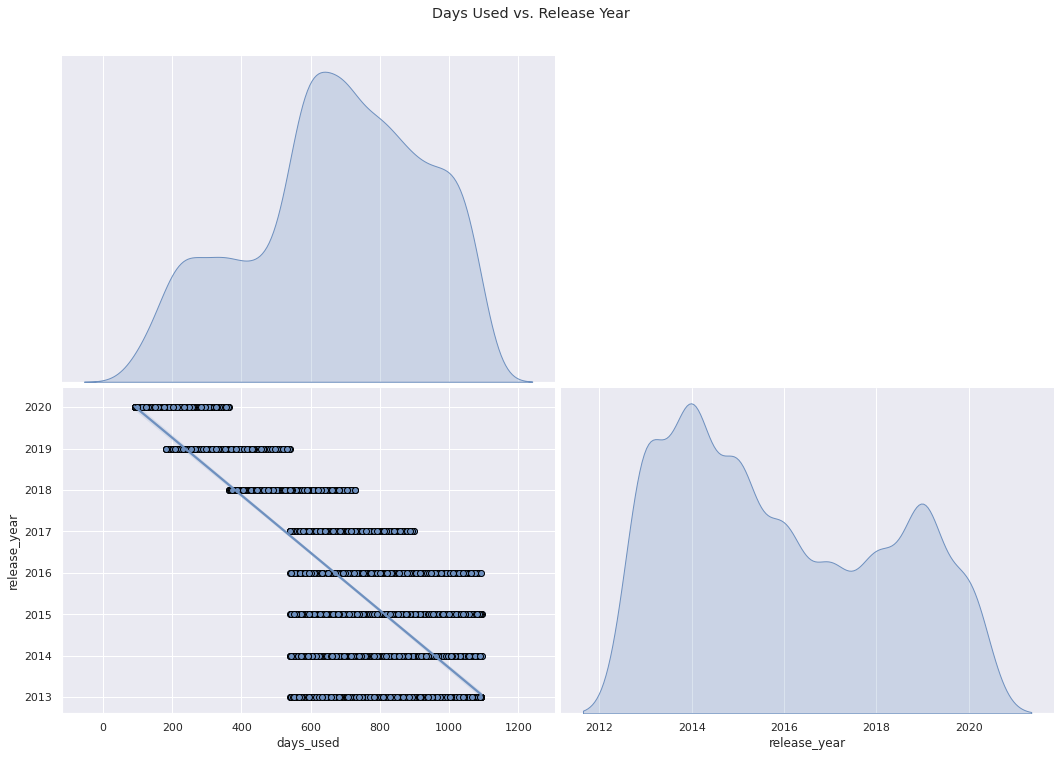

In [ ]:
plot_pairplot(df, ['days_used','release_year'], 'Days Used vs. Release Year')

**Observations:**

The pair plot indicates a strong negative correlation between the number of days used and the release year. 

Specifically, it shows that devices released more recently tend to have been used less.





**Moderate Correlation**

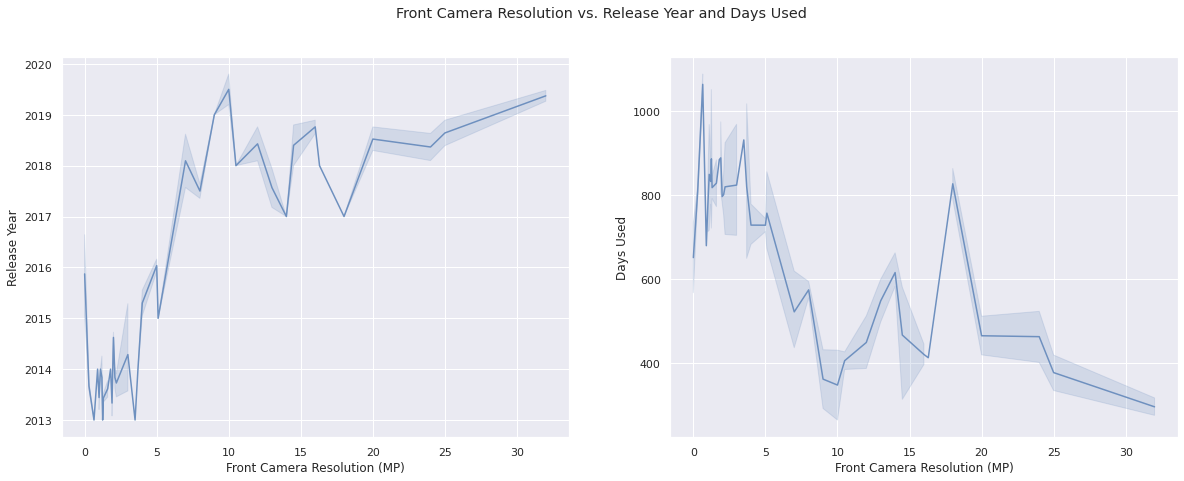

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the subplots and set the figure size
fig, axes = plt.subplots(ncols=2, figsize=(20, 7))
fig.suptitle('Front Camera Resolution vs. Release Year and Days Used')

# Create the first line plot for selfie_camera_mp and release_year
sns.lineplot(x='selfie_camera_mp', y='release_year', data=df, ax=axes[0])
axes[0].set_xlabel('Front Camera Resolution (MP)')
axes[0].set_ylabel('Release Year')

# Create the second line plot for selfie_camera_mp and days_used
sns.lineplot(x='selfie_camera_mp', y='days_used', data=df, ax=axes[1])
axes[1].set_xlabel('Front Camera Resolution (MP)')
axes[1].set_ylabel('Days Used')

# Show the plot
plt.show()


**Observations:**

Based on the observations, there is a negative correlation between the front camera resolution and the number of days a mobile has been used, and a positive correlation between the front camera resolution and release year.

The positive correlation between front camera resolution and release year suggests that newer mobiles tend to have higher front camera resolutions.

The negative correlation between front camera resolution and days used implies that older mobiles tend to have lower front camera resolutions.

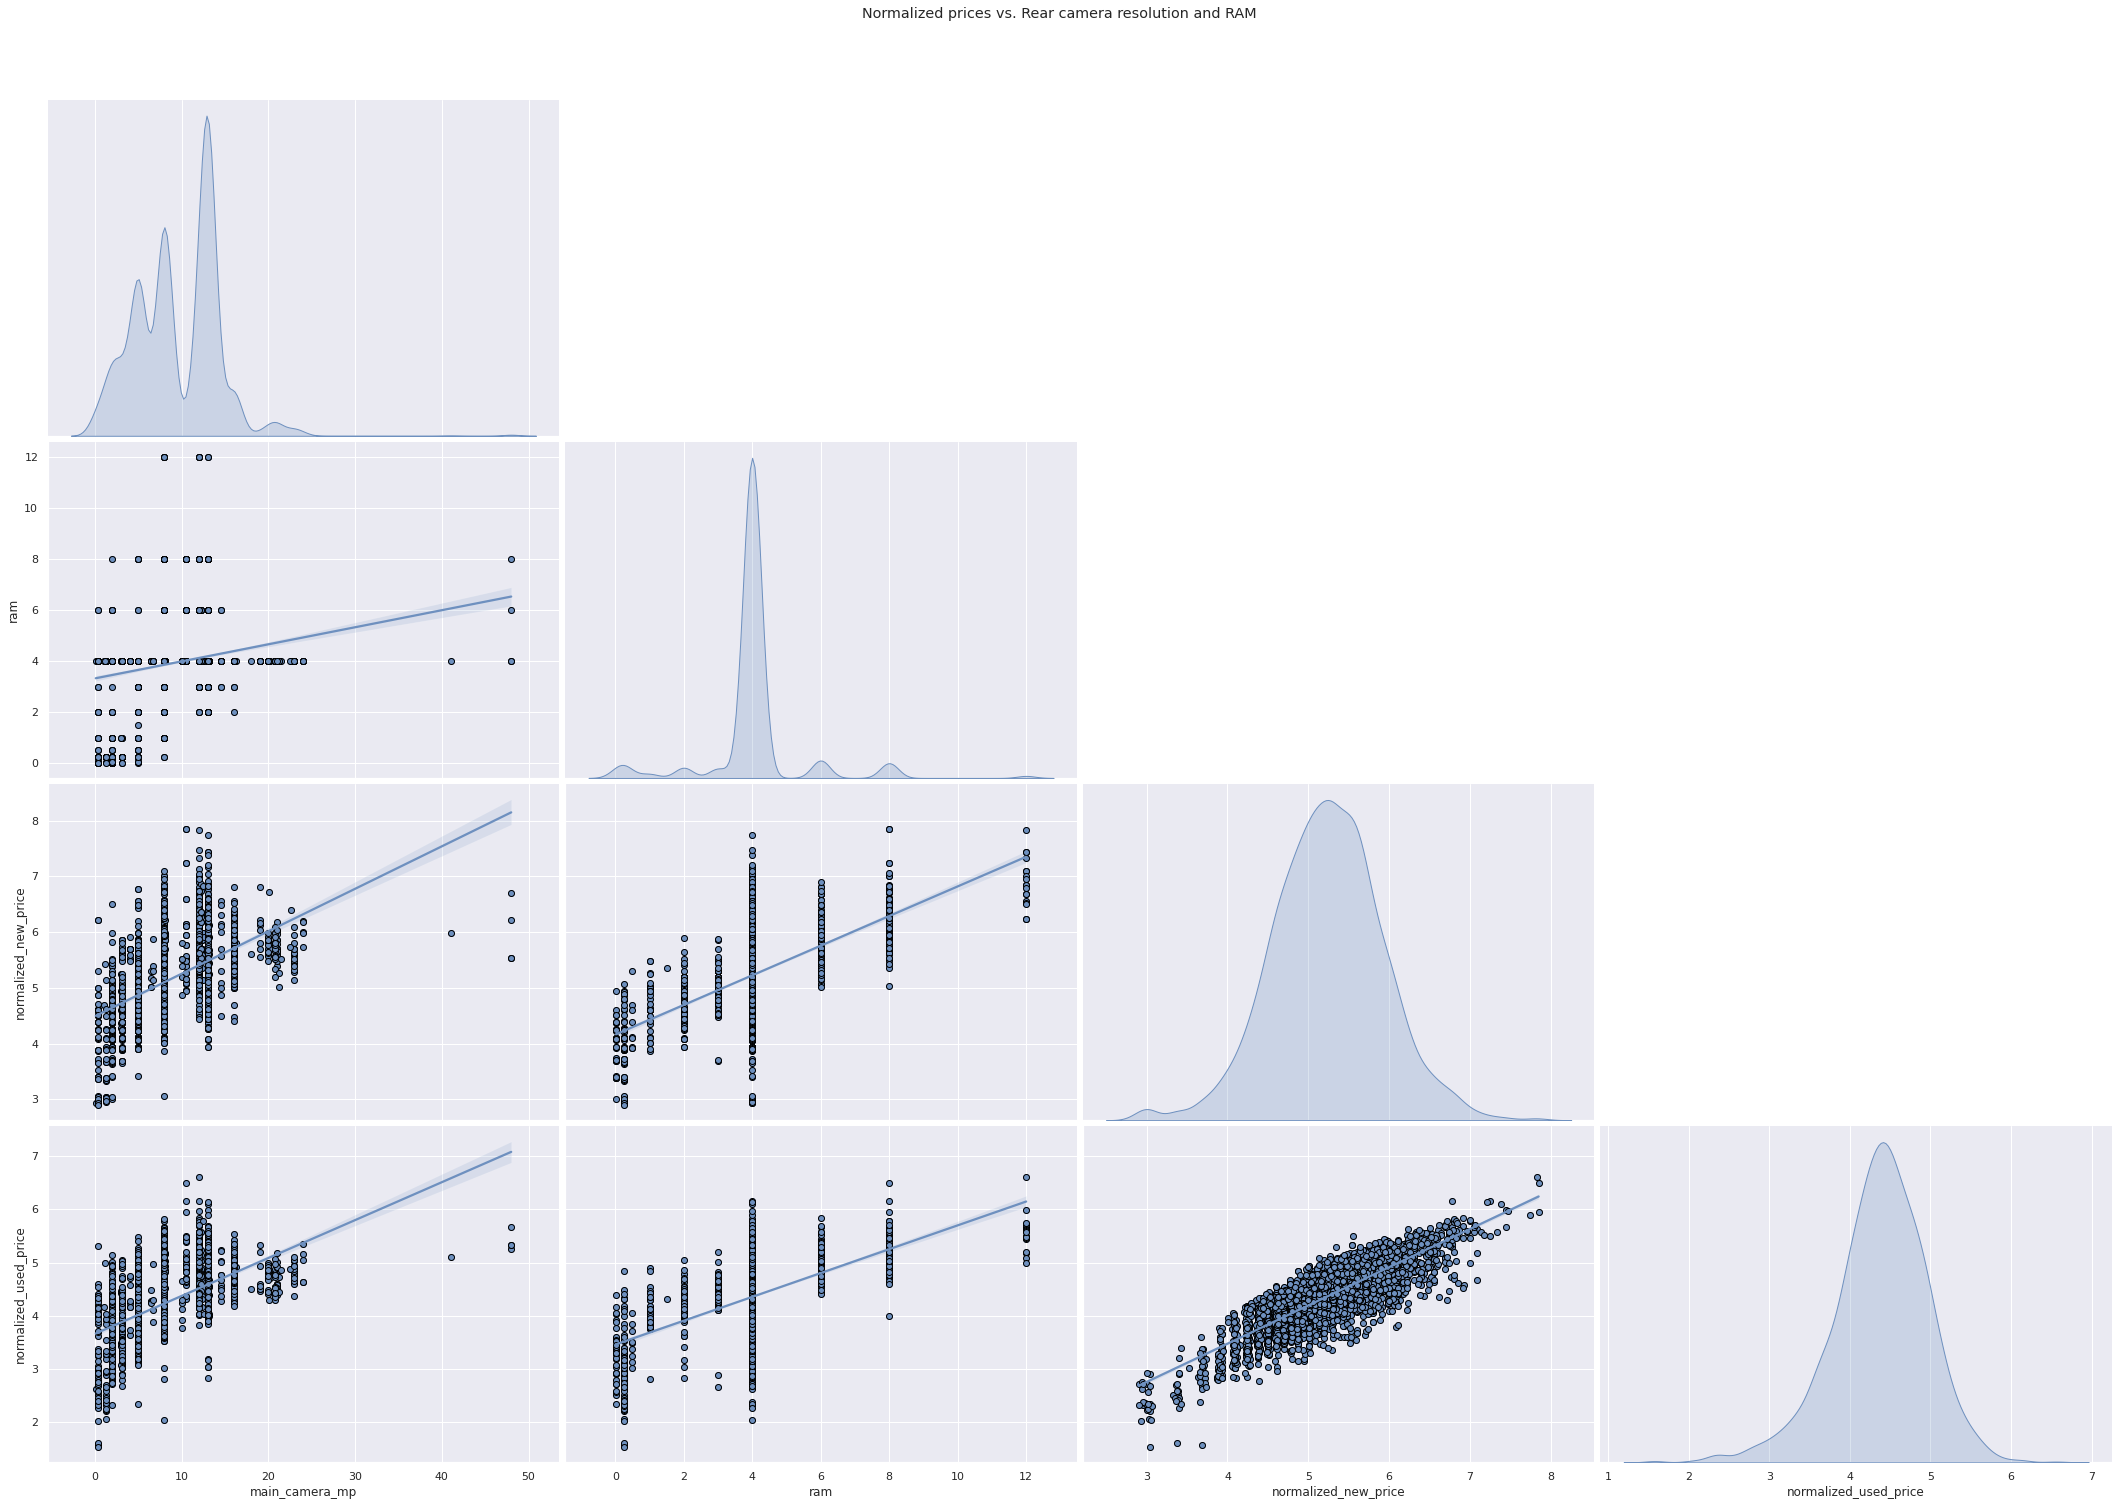

In [ ]:
plot_pairplot(df, ['main_camera_mp', 'ram','normalized_new_price','normalized_used_price'], 'Normalized prices vs. Rear camera resolution and RAM')

**Observations:**

The normalized new price and the old price has a positive correlation with the rear camera resolution and RAM.

We can observe that RAM and rear camera resolution have similar levels of correlation with normalized new and used prices.

**Normalized Used Price vs. other Dependent Variables**

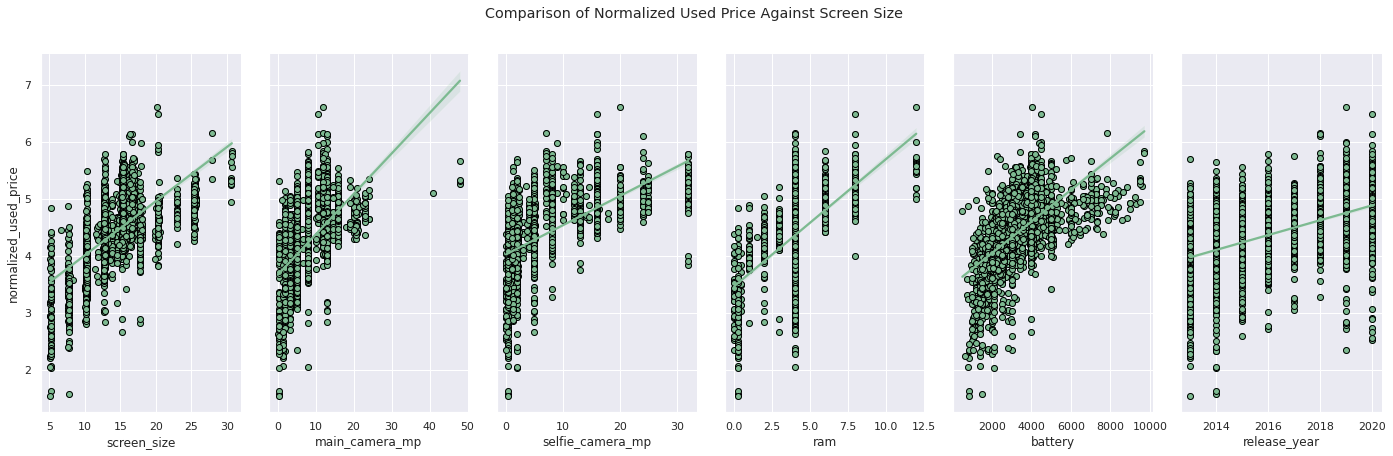

In [ ]:
import seaborn as sns
def add_edgecolor(x, y, **kwargs):
        ax = plt.gca()
        ax.scatter(x, y, edgecolor='black', **kwargs)

# Set the color palette
my_palette = sns.color_palette('crest')
sns.set_palette(my_palette)

# Create the pairplot 
pplot = sns.pairplot(data=df,x_vars=['screen_size', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'battery', 'release_year'],
                     y_vars=['normalized_used_price'], kind='reg')
  
# Add edge color to the scatter plot points using the custom plotting function
pplot.map_offdiag(add_edgecolor)

# Set the plot title
pplot.fig.suptitle('Comparison of Normalized Used Price Against Screen Size', y=1.05)
pplot.fig.set_size_inches(20,7)

# Show the plot
plt.show()


**Observations:**

We can see the Target Variable( Normalized Used Price) having a positive correlation with Screen size,front camera resolution, rear camera resolution,RAM,Battery and release year.

**Brand Name vs. Mobile Network**

In [ ]:
top10_brand_name =	df['brand_name'].value_counts().reset_index().iloc[0:10,0]
print(top10_brand_name)
df_top10_brand_name = df[df['brand_name'].isin(top10_brand_name)]

0     Others
1    Samsung
2     Huawei
3         LG
4     Lenovo
5        ZTE
6     Xiaomi
7       Oppo
8       Asus
9    Alcatel
Name: index, dtype: object


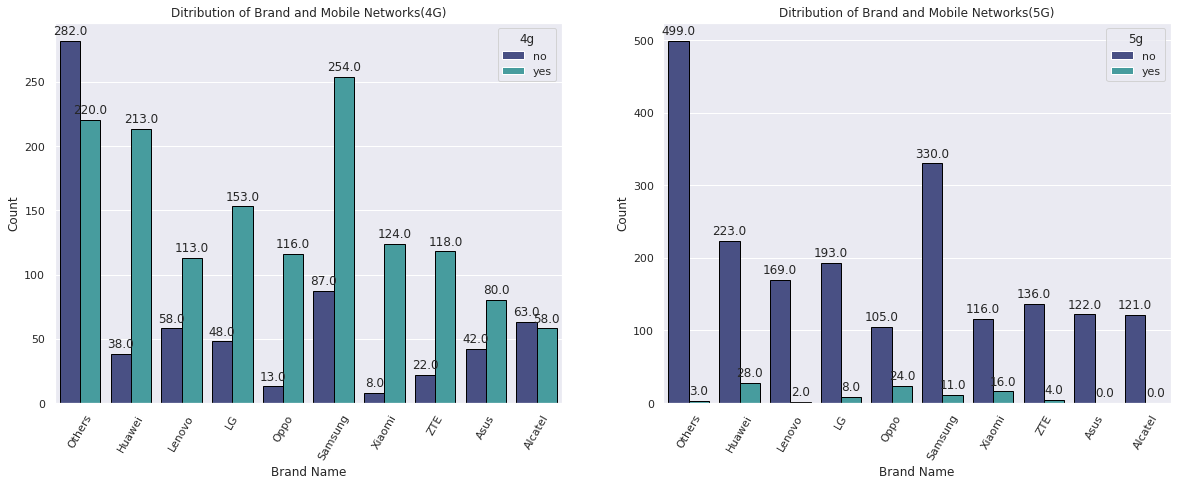

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 7))

# Create the first subplot for 4G
plt.subplot(1, 2, 1)
cplot=sns.countplot(data=df_top10_brand_name, x='brand_name',palette='mako',hue='4g')
plt.title('Ditribution of Brand and Mobile Networks(4G)')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.xticks(rotation=60)

# Annotate the values on the bars
for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    p.set_edgecolor('black')
    p.set_linewidth(1)
# Create the second subplot for 5G
plt.subplot(1, 2, 2)
cplot=sns.countplot(data=df_top10_brand_name, x='brand_name',palette='mako',hue='5g')
plt.title('Ditribution of Brand and Mobile Networks(5G)')
plt.xlabel('Brand Name')
plt.ylabel('Count')
plt.xticks(rotation=60)

# Annotate the values on the bars
for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    p.set_edgecolor('black')
    p.set_linewidth(1)

# Show the plot
plt.show()


**Observations:**

When comparing the distribution of 4G and 5G networks across the top 5 brands, the proportion of used mobile phones and tablets with 4G is very high compared to those with 5G.



**Mobile Network**


   4g_count  5g_count  4g_5g_count  no_4g_5g
0      2335       152          152      1119


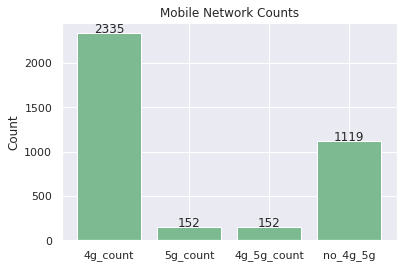

In [ ]:
df_4g_5g = df[(df['4g'] == 'yes') & (df['5g'] == 'yes')]
df_4g=(df['4g'] == 'yes').sum()
df_5g=(df['5g'] == 'yes').sum()
df_no_network=df[(df['4g'] == 'no') & (df['5g'] == 'no')]
print()
data = {'4g_count': [df_4g], '5g_count': [df_5g], '4g_5g_count': [len(df_4g_5g)], 'no_4g_5g':[len(df_no_network)]}
df_mobile_network_counts = pd.DataFrame(data)
print(df_mobile_network_counts)

import matplotlib.pyplot as plt

# create the bar chart
plt.bar(df_mobile_network_counts.columns, df_mobile_network_counts.iloc[0])

# add annotations for each bar
for i, count in enumerate(df_mobile_network_counts.iloc[0]):
    plt.text(i, count + 1, str(count), ha='center')

# set chart title and axis labels
plt.title('Mobile Network Counts')
plt.ylabel('Count')

# display the chart
plt.show()


**Observations:**

There are total 3454 observations of which 1119 have no mobile network and 152 have both 4G and 5G and 2335 have only 4G netwroks.

**Operating System vs. Mobile Network**

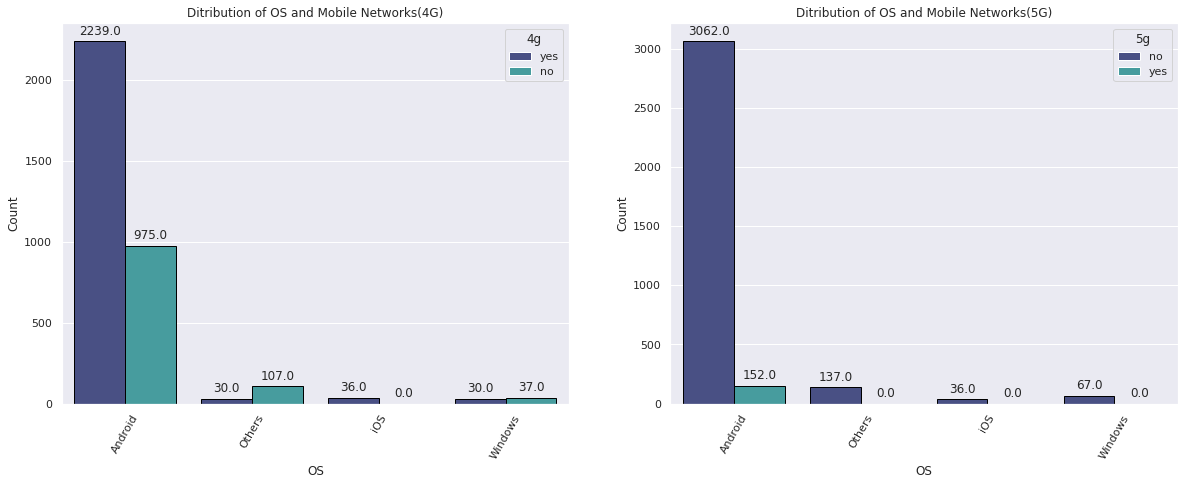

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Set the figure size
plt.figure(figsize=(20, 7))

# Create the first subplot for 4G
plt.subplot(1, 2, 1)
cplot=sns.countplot(data=df, x='os',palette='mako',hue='4g')
plt.title('Ditribution of OS and Mobile Networks(4G)')
plt.xlabel('OS')
plt.ylabel('Count')
plt.xticks(rotation=60)

# Annotate the values on the bars
for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    p.set_edgecolor('black')
    p.set_linewidth(1)
# Create the second subplot for 5G
plt.subplot(1, 2, 2)
cplot=sns.countplot(data=df, x='os',palette='mako',hue='5g')
plt.title('Ditribution of OS and Mobile Networks(5G)')
plt.xlabel('OS')
plt.ylabel('Count')
plt.xticks(rotation=60)

# Annotate the values on the bars
for p in cplot.patches:
    cplot.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()),  ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
    p.set_edgecolor('black')
    p.set_linewidth(1)

# Show the plot
plt.show()


**Observations:**

4G Android used mobiles and Tablets are in higher proportions than any other OS.

5G mobile network is available only in android mobiles and the number of mobiles are limited to 152.




**Normalized Used Price vs. Mobile Network**

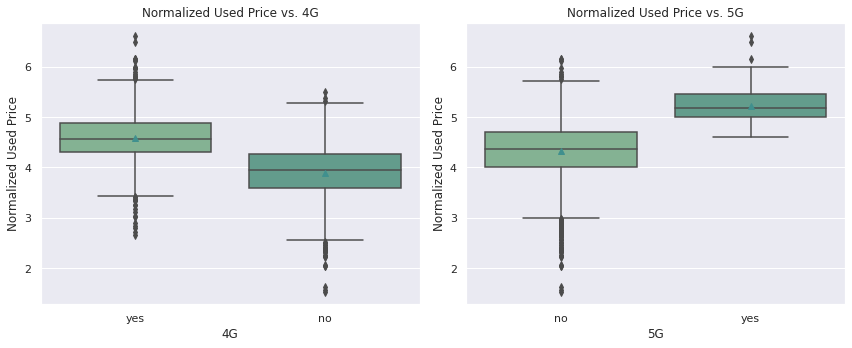

In [ ]:
plt.figure(figsize=(12, 5))

plt.subplot(121)
sns.boxplot(data=df, x="4g", y="normalized_used_price",showmeans=True)
plt.xlabel("4G")
plt.ylabel("Normalized Used Price")
plt.title('Normalized Used Price vs. 4G')

plt.subplot(122)
sns.boxplot(data=df, x="5g", y="normalized_used_price",showmeans=True)
plt.xlabel("5G")
plt.ylabel("Normalized Used Price")
plt.title('Normalized Used Price vs. 5G')
plt.tight_layout()
plt.show()


Devices with 5G Mobile network is more expensive compared to that of 4G Mobile networks.

**Normalized Used Price vs OS**

Text(0.5, 1.0, 'Normalized Used Price vs. OS')

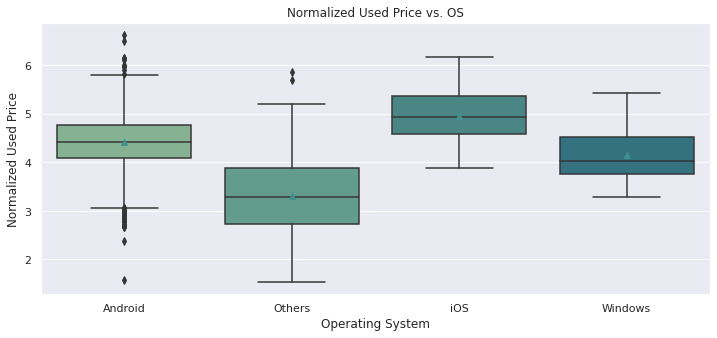

In [ ]:
plt.figure(figsize=(12, 5))
sns.boxplot(data=df, x="os", y="normalized_used_price",showmeans=True)
plt.xlabel("Operating System")
plt.ylabel("Normalized Used Price")
plt.title('Normalized Used Price vs. OS')


While iOS devices appear to be generally more expensive than those running on other operating systems, there are some outliers observed in the prices of devices running on Android and other unidentified operating systems.

**Normalized Used Price vs. Brand**

<ipython-input-71-5b50dfa519b7>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  bplot=sns.barplot(data=df, x="brand_name", y="normalized_used_price",palette='summer',ci=None)


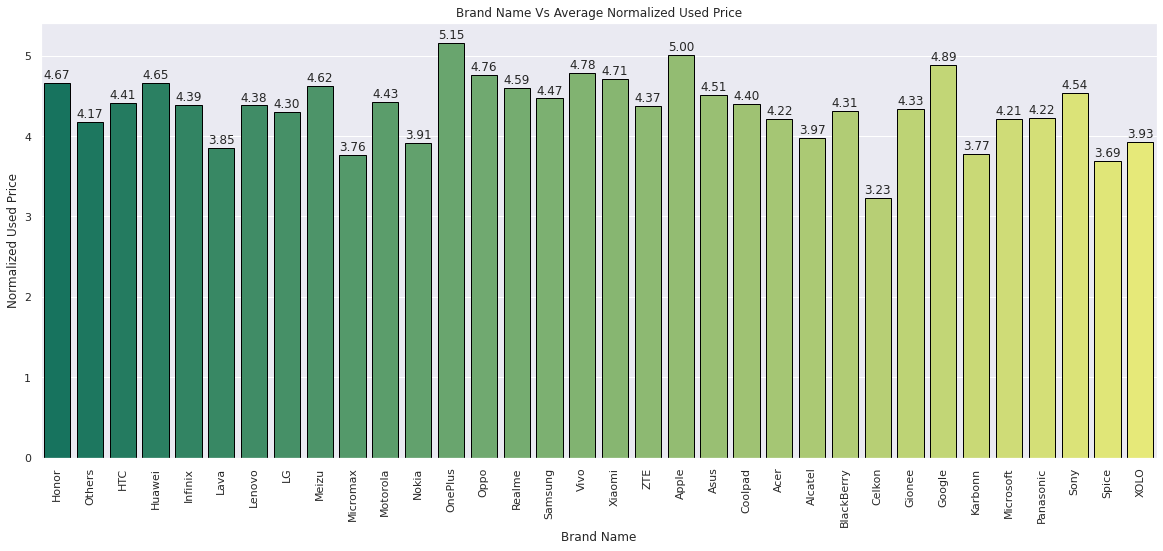

In [ ]:
plt.figure(figsize=(20,8)) 
bplot=sns.barplot(data=df, x="brand_name", y="normalized_used_price",palette='summer',ci=None)
for bar in bplot.patches:
    bplot.annotate(format(bar.get_height(), '.2f'),
                   (bar.get_x() + bar.get_width() / 2,
                    bar.get_height()), ha='center', va='center',
                   size=12, xytext=(0, 8),
                   textcoords='offset points')
    bar.set_edgecolor('black')
    bar.set_linewidth(1)
plt.title('Brand Name Vs Average Normalized Used Price')
plt.xlabel('Brand Name')
plt.ylabel('Normalized Used Price')
plt.xticks(rotation=90)
plt.show();

In [ ]:
df.groupby("brand_name")["normalized_used_price"].mean().sort_values(ascending=False).head(10)

brand_name
OnePlus    5.152165
Apple      5.004553
Google     4.885651
Vivo       4.778147
Oppo       4.755252
Xiaomi     4.710581
Honor      4.665257
Huawei     4.654566
Meizu      4.622101
Realme     4.594316
Name: normalized_used_price, dtype: float64

**Observations:**

The Average Normalized Used price of various brands range from 5.15 EUR to 3.23 EUR.

The brands with highest average Normalized price is One plus followed by Apple, Google,Vivo, Oppo and Xiaomi.



## Data Preprocessing

- Missing value treatment
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling
- Any other preprocessing steps (if needed)

**Missing Value Treatment**

In [ ]:
# let's create a copy of the data
df1 = df.copy()

In [ ]:
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 4
ram                        4
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

**Observations:**

The following columns have missing values and requires treatment

1.  weight
2.  battery
3.  ram
4.  int_memory
5.  selfie_camera_mp
6.  main_camera_mp

In [ ]:
# Imputing the missing values in the data by the column medians grouped by release_year and brand_name.
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "int_memory",
    "ram",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['release_year','brand_name'])[col].transform("median")
    )  
# checking for missing values
df1.isnull().sum()

brand_name                 0
os                         0
screen_size                0
4g                         0
5g                         0
main_camera_mp           179
selfie_camera_mp           2
int_memory                 0
ram                        0
battery                    6
weight                     7
release_year               0
days_used                  0
normalized_used_price      0
normalized_new_price       0
dtype: int64

In [ ]:
#Imputing the missing values in the data by the column medians grouped by brand_name.
cols_impute = [
    "main_camera_mp",
    "selfie_camera_mp",
    "battery",
    "weight",
]

for col in cols_impute:
    df1[col] = df1[col].fillna(
        value=df1.groupby(['brand_name'])[col].transform("median")
    ) 

# checking for missing values
df1.isnull().sum() 

brand_name                0
os                        0
screen_size               0
4g                        0
5g                        0
main_camera_mp           10
selfie_camera_mp          0
int_memory                0
ram                       0
battery                   0
weight                    0
release_year              0
days_used                 0
normalized_used_price     0
normalized_new_price      0
dtype: int64

In [ ]:
#Imputing the missing values in the data by the column medians
df1["main_camera_mp"] = df1["main_camera_mp"].fillna(df1["main_camera_mp"].median())

# checking for missing values
df1.isnull().sum() 

brand_name               0
os                       0
screen_size              0
4g                       0
5g                       0
main_camera_mp           0
selfie_camera_mp         0
int_memory               0
ram                      0
battery                  0
weight                   0
release_year             0
days_used                0
normalized_used_price    0
normalized_new_price     0
dtype: int64

**Observations:**

All the missing values are treated.

**Feature Engineering**

Let's create a new feature years_since_release by taking the difference between release_year column and 2021 as we will consider the year of data collection, 2021, as the baseline.

We will also drop the original column as new feature is created.

In [ ]:
df1["years_since_release"] = 2021 - df1["release_year"]
df1.drop("release_year", axis=1, inplace=True)

In [ ]:
#Dataset with our new feature 'years_since_release'
df1

,brand_name,os,screen_size,4g,5g,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_used_price,normalized_new_price,years_since_release
0,Honor,Android,14.50,yes,no,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.307572,4.715100,1
1,Honor,Android,17.30,yes,yes,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.162097,5.519018,1
2,Honor,Android,16.69,yes,yes,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.111084,5.884631,1
3,Honor,Android,25.50,yes,yes,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.135387,5.630961,1
4,Honor,Android,15.32,yes,no,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.389995,4.947837,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3449,Asus,Android,15.34,yes,no,13.0,8.0,64.0,6.0,5000.0,190.0,232,4.492337,6.483872,2
3450,Asus,Android,15.24,yes,no,13.0,8.0,128.0,8.0,4000.0,200.0,541,5.037732,6.251538,3
3451,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,3.0,4000.0,165.0,201,4.357350,4.528829,1
3452,Alcatel,Android,15.80,yes,no,13.0,5.0,32.0,2.0,4000.0,160.0,149,4.349762,4.624188,1


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3454 entries, 0 to 3453
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   brand_name             3454 non-null   object 
 1   os                     3454 non-null   object 
 2   screen_size            3454 non-null   float64
 3   4g                     3454 non-null   object 
 4   5g                     3454 non-null   object 
 5   main_camera_mp         3454 non-null   float64
 6   selfie_camera_mp       3454 non-null   float64
 7   int_memory             3454 non-null   float64
 8   ram                    3454 non-null   float64
 9   battery                3454 non-null   float64
 10  weight                 3454 non-null   float64
 11  days_used              3454 non-null   int64  
 12  normalized_used_price  3454 non-null   float64
 13  normalized_new_price   3454 non-null   float64
 14  years_since_release    3454 non-null   int64  
dtypes: f

The information of the columns and the Non-null count is displayed after adding the new feature years_since_release.

**Outlier Treatment**

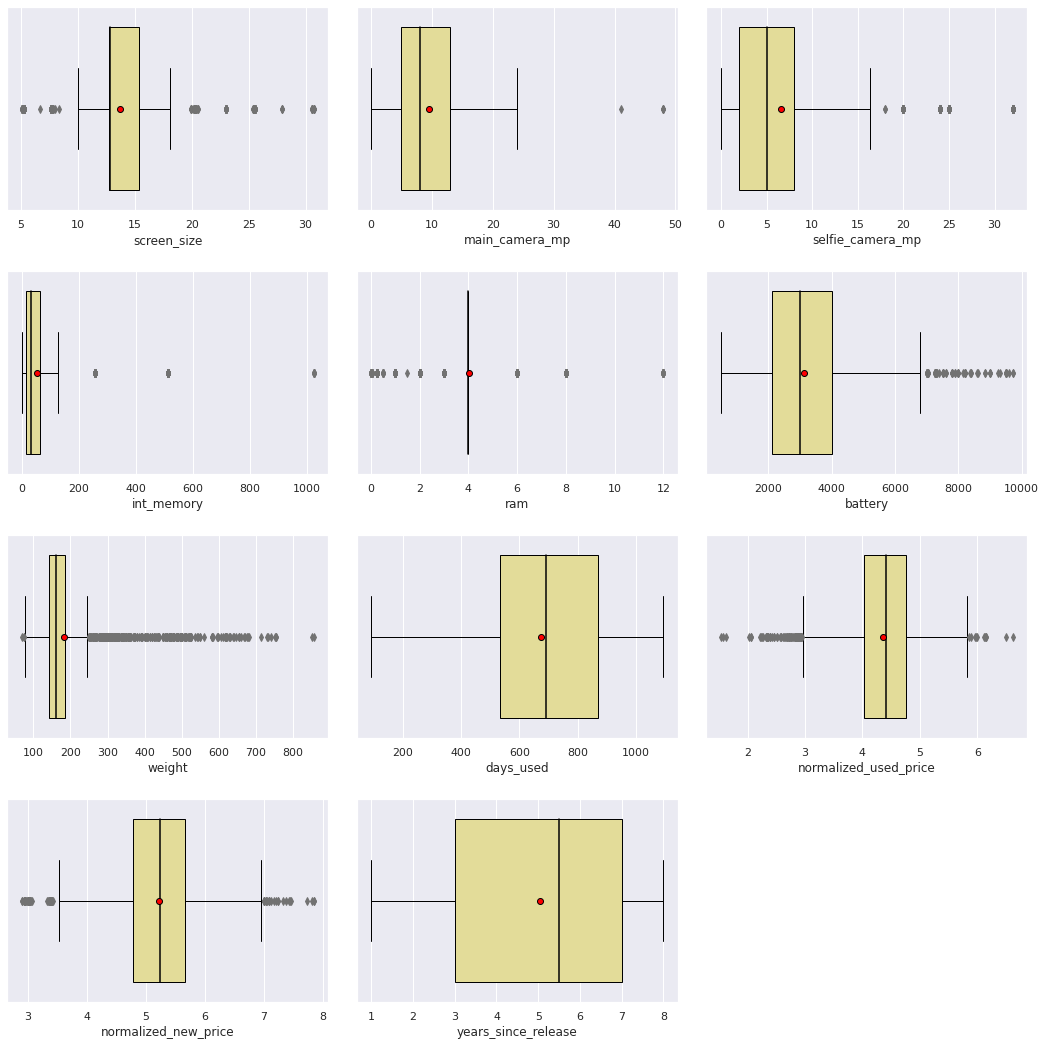

In [ ]:
num_cols = df1.select_dtypes(include=np.number).columns.tolist()

plt.figure(figsize=(15, 15))

for i, variable in enumerate(num_cols):
    plt.subplot(4, 3, i + 1)
    #sns.boxplot(data=df1, x=variable)
    sns.boxplot(data=df1, x=variable, showmeans=True, color="khaki",meanprops={"marker":"o", "markerfacecolor":"red", "markeredgecolor":"black"},boxprops=dict(linewidth=1, edgecolor='black'),medianprops={"color": "black"},whiskerprops={'color': 'black', 'linewidth': 1},capprops={'color': 'black', 'linewidth': 1})
    plt.tight_layout(pad=2)

plt.show()

**Observations:**

There are few Outliers present in the data.

The outliers present in the data are valid data points that are simply extreme values compared to the rest of the data.  We choose to keep the outliers and proceed with the analysis.

**Preparing Data for Modelling**

We want to predict the price of used/refurbished phones and tablets.

Before we proceed to build a model, we'll have to encode categorical features.

We'll split the data into train and test to be able to evaluate the model that we build on the train data.

We will build a Linear Regression model using the train data and then check its performance.


In [ ]:
# defining X and y variables
X = df1.drop(["normalized_used_price"], axis=1)
y = df1["normalized_used_price"]

print(X.head())
print()
print(y.head())

  brand_name       os  screen_size   4g   5g  main_camera_mp  \
0      Honor  Android        14.50  yes   no            13.0   
1      Honor  Android        17.30  yes  yes            13.0   
2      Honor  Android        16.69  yes  yes            13.0   
3      Honor  Android        25.50  yes  yes            13.0   
4      Honor  Android        15.32  yes   no            13.0   

   selfie_camera_mp  int_memory  ram  battery  weight  days_used  \
0               5.0        64.0  3.0   3020.0   146.0        127   
1              16.0       128.0  8.0   4300.0   213.0        325   
2               8.0       128.0  8.0   4200.0   213.0        162   
3               8.0        64.0  6.0   7250.0   480.0        345   
4               8.0        64.0  3.0   5000.0   185.0        293   

   normalized_new_price  years_since_release  
0              4.715100                    1  
1              5.519018                    1  
2              5.884631                    1  
3              5.6

In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
X = pd.get_dummies(
    X,
    columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),
    drop_first=True,
)
X.head()

,const,screen_size,main_camera_mp,selfie_camera_mp,int_memory,ram,battery,weight,days_used,normalized_new_price,...,brand_name_Spice,brand_name_Vivo,brand_name_XOLO,brand_name_Xiaomi,brand_name_ZTE,os_Others,os_Windows,os_iOS,4g_yes,5g_yes
0,1.0,14.50,13.0,5.0,64.0,3.0,3020.0,146.0,127,4.715100,...,0,0,0,0,0,0,0,0,1,0
1,1.0,17.30,13.0,16.0,128.0,8.0,4300.0,213.0,325,5.519018,...,0,0,0,0,0,0,0,0,1,1
2,1.0,16.69,13.0,8.0,128.0,8.0,4200.0,213.0,162,5.884631,...,0,0,0,0,0,0,0,0,1,1
3,1.0,25.50,13.0,8.0,64.0,6.0,7250.0,480.0,345,5.630961,...,0,0,0,0,0,0,0,0,1,1
4,1.0,15.32,13.0,8.0,64.0,3.0,5000.0,185.0,293,4.947837,...,0,0,0,0,0,0,0,0,1,0


In [ ]:
# splitting the data in 70:30 ratio for train to test data
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
#Returns the rows in Train and Test Dataset
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 2417
Number of rows in test data = 1037


## EDA - After Data Preprocessing

Performing Univariate Analysis on Features that are processed


1.  weight
2.  battery
3.  ram
4.  int_memory
5.  selfie_camera_mp
6.  main_camera_mp

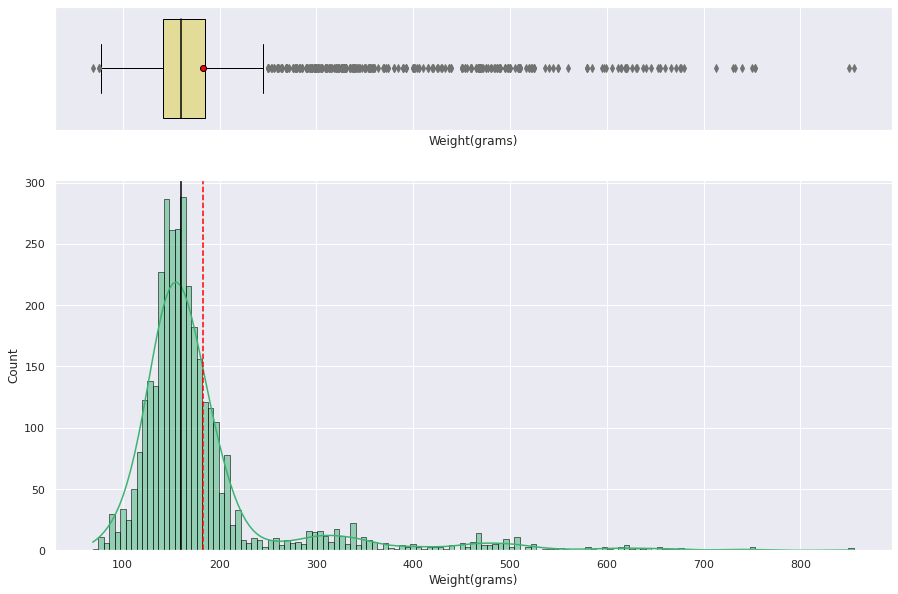

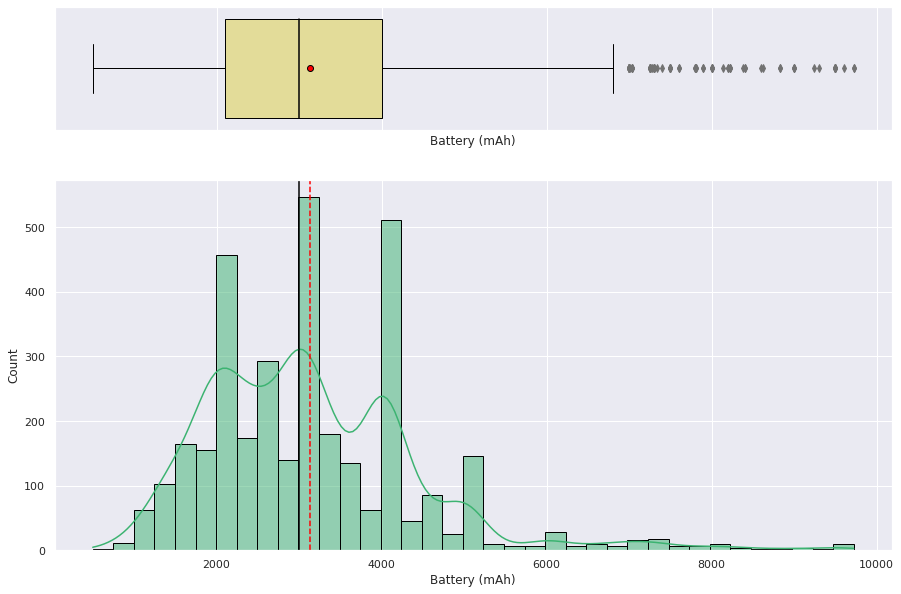

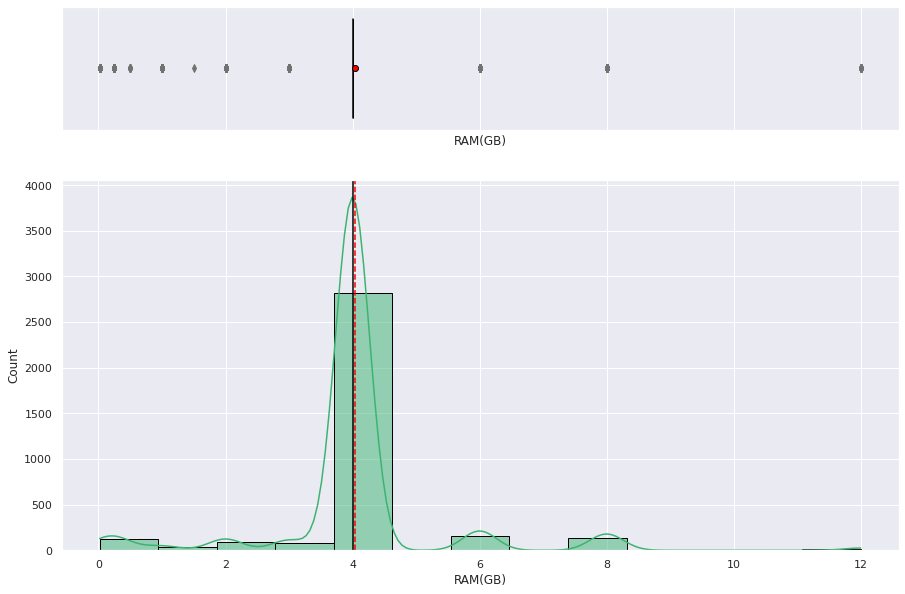

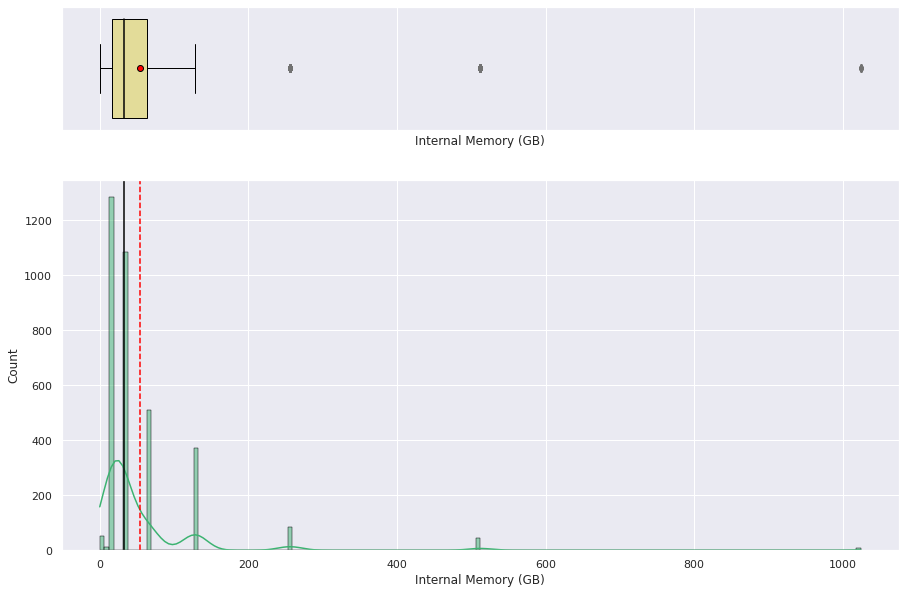

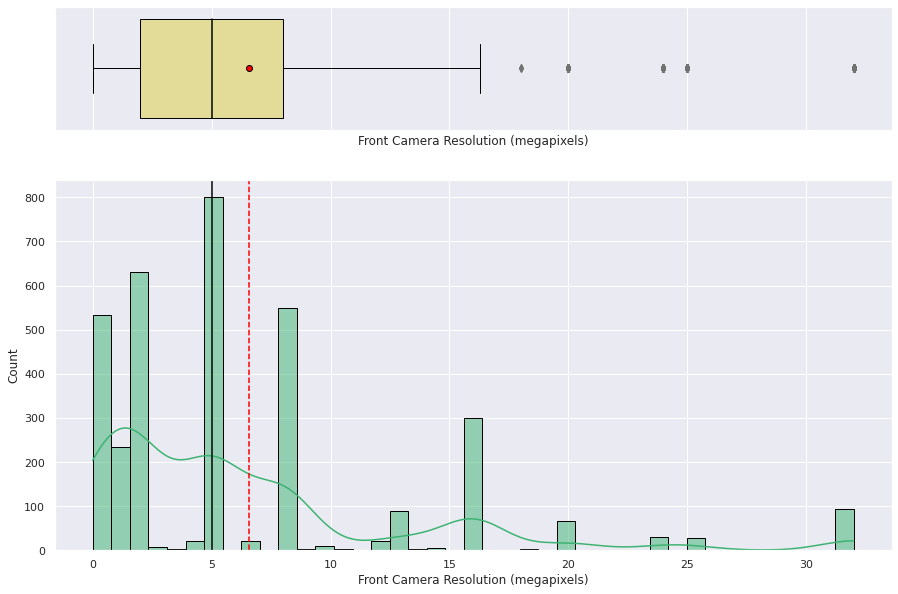

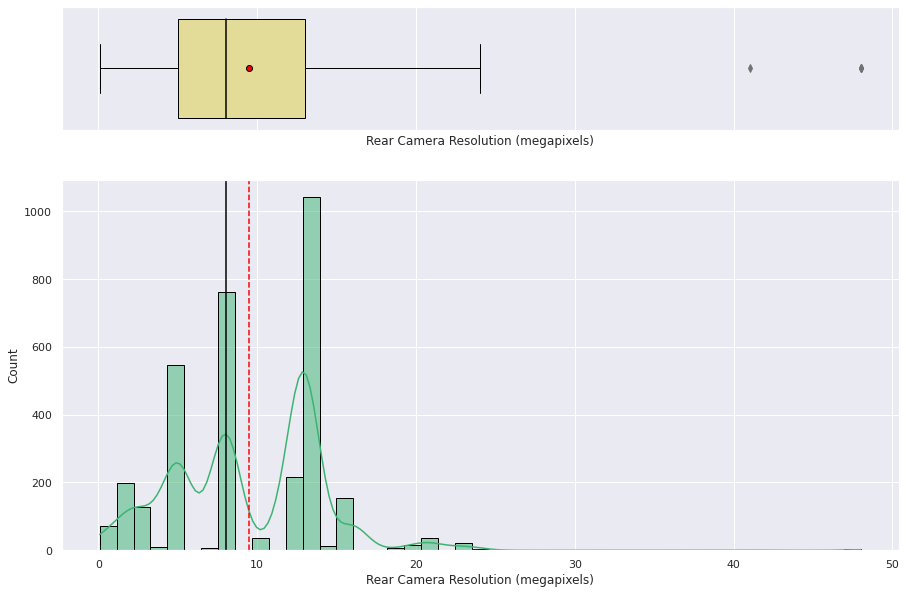

In [ ]:
histogram_boxplot(data=df,feature="weight",xlabel='Weight(grams)', ylabel='Count')
histogram_boxplot(data=df,feature="battery",xlabel='Battery (mAh)', ylabel='Count')
histogram_boxplot(data=df,feature="ram",xlabel='RAM(GB)', ylabel='Count')
histogram_boxplot(data=df,feature="int_memory",xlabel='Internal Memory (GB)', ylabel='Count')
histogram_boxplot(data=df,feature="selfie_camera_mp",xlabel='Front Camera Resolution (megapixels)', ylabel='Count')
histogram_boxplot(data=df,feature="main_camera_mp",xlabel='Rear Camera Resolution (megapixels)', ylabel='Count')

In [ ]:
cols_impute

['main_camera_mp', 'selfie_camera_mp', 'battery', 'weight']

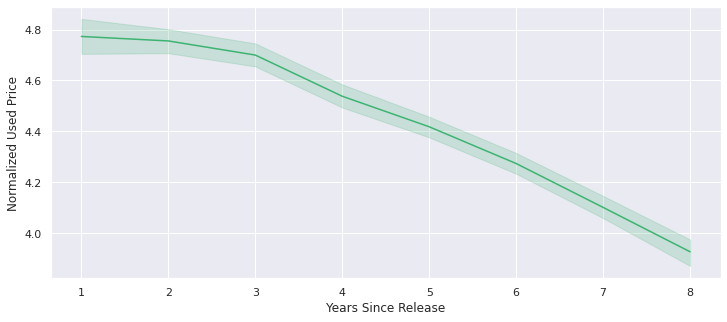

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the figure size
plt.figure(figsize=(12, 5))

# Plot the line graph
sns.lineplot(data=df1, x='years_since_release', y='normalized_used_price', color='mediumseagreen')

# Set the x-axis and y-axis labels
plt.xlabel('Years Since Release', fontsize=12)
plt.ylabel('Normalized Used Price', fontsize=12)

# Show the plot
plt.show()


## Model Building - Linear Regression

In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.845
Model:                               OLS   Adj. R-squared:                  0.842
Method:                    Least Squares   F-statistic:                     268.7
Date:                   Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                           15:51:01   Log-Likelihood:                 123.85
No. Observations:                   2417   AIC:                            -149.7
Df Residuals:                       2368   BIC:                             134.0
Df Model:                             48                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


## Model Performance Check

Let's check the performance of the model using different metrics.

We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.

We will define a function to calculate MAPE and adjusted $R^2$.
   
We will create a function that will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.229884,0.180326,0.844886,0.841675,4.326841


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.238358,0.184749,0.842479,0.834659,4.501651


**Observations**

**RMSE:** The RMSE of train and test data is comparable and indicates a better fit of the model to the training data.

**MAE:** MAE of the train and test data is comparable and indicates the models are not overfitting.MAE is often used in situations where outliers or extreme values in the data may significantly affect the performance of the model.

MAE suggests that the model can predict the price of used/refurbished phones and tablets within a mean error of 0.1847 on the test data.

**MAPE:**
MAPE is often used in situations where the scale of the dependent variable is significant, and it is important to measure the accuracy of the model in percentage terms. 

MAPE of 4.5 on the test data means that the model's predicted prices are off by 4.5% from the actual prices of the used phones in the test data.

**R-square and Adjusted R-square:**
The R-Square and Adjusted R-square of Train and Test data are comparable indicating the model is performing better on test and train data.

A high R-squared value of 0.842479 on the test data means that the model explains 84.25% of the variance in the dependent variable.

## Checking Linear Regression Assumptions

In order to make statistical inferences from a linear regression model, it is important to ensure that the assumptions of linear regression are satisfied.

We will be checking the following Linear Regression assumptions:

1.   No Multicollinearity
2.   Linearity of variables
3.   Independence of error terms
4.   Normality of error terms
5.   No Heteroscedasticity

### TEST FOR MULTICOLLINEARITY

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity.

Let's define a function to check VIF.

In [ ]:
def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,227.744081
1,screen_size,7.677290
2,main_camera_mp,2.285051
3,selfie_camera_mp,2.812473
4,int_memory,1.364152
5,ram,2.282352
6,battery,4.081780
7,weight,6.396749
8,days_used,2.660269
9,normalized_new_price,3.119430


* There are multiple columns with very high VIF values, indicating presence of strong multicollinearity
* We will systematically drop numerical columns with VIF > 5
* We will ignore the VIF values for dummy variables and the constant (intercept)

### Removing Multicollinearity

To remove multicollinearity

1. Drop every column one by one that has a VIF score greater than 5.
2. Look at the adjusted R-squared and RMSE of all these models.
3. Drop the variable that makes the least change in adjusted R-squared.
4. Check the VIF scores again.
5. Continue till you get all VIF scores under 5.

Let's define a function that will help us do this.

In [ ]:
def treating_multicollinearity(predictors, target, high_vif_columns):
    """
    Checking the effect of dropping the columns showing high multicollinearity
    on model performance (adj. R-squared and RMSE)

    predictors: independent variables
    target: dependent variable
    high_vif_columns: columns having high VIF
    """
    # empty lists to store adj. R-squared and RMSE values
    adj_r2 = []
    rmse = []

    # build ols models by dropping one of the high VIF columns at a time
    # store the adjusted R-squared and RMSE in the lists defined previously
    for cols in high_vif_columns:
        # defining the new train set
        train = predictors.loc[:, ~predictors.columns.str.startswith(cols)]

        # create the model
        olsmodel = sm.OLS(target, train).fit()

        # adding adj. R-squared and RMSE to the lists
        adj_r2.append(olsmodel.rsquared_adj)
        rmse.append(np.sqrt(olsmodel.mse_resid))

    # creating a dataframe for the results
    temp = pd.DataFrame(
        {
            "col": high_vif_columns,
            "Adj. R-squared after_dropping col": adj_r2,
            "RMSE after dropping col": rmse,
        }
    ).sort_values(by="Adj. R-squared after_dropping col", ascending=False)
    temp.reset_index(drop=True, inplace=True)

    return temp

In [ ]:
col_list = ["screen_size", "weight"]
res = treating_multicollinearity(x_train, y_train, col_list)
res

,col,Adj. R-squared after_dropping col,RMSE after dropping col
0,screen_size,0.838381,0.234703
1,weight,0.838071,0.234928


We will start by dropping the screen_size

In [ ]:
col_to_drop = "screen_size"
x_train2 = x_train.loc[:, ~x_train.columns.str.startswith(col_to_drop)]
x_test2 = x_test.loc[:, ~x_test.columns.str.startswith(col_to_drop)]

# Check VIF now
vif = checking_vif(x_train2)
print("VIF after dropping ", col_to_drop)
vif

VIF after dropping  screen_size


,feature,VIF
0,const,202.673906
1,main_camera_mp,2.281835
2,selfie_camera_mp,2.809009
3,int_memory,1.362043
4,ram,2.282350
5,battery,3.842989
6,weight,2.993855
7,days_used,2.648929
8,normalized_new_price,3.077650
9,years_since_release,4.730315


The VIFs for dummy variables can be ignored unless all the dummies for a categorical variable have high VIF, in which case we can drop the categorical variable as a whole.

We have dealt with multicollinearity in the data. 

Let's rebuild the model using the updated set of predictors variables

In [ ]:
olsmod1 = sm.OLS(y_train, x_train2).fit()
print(olsmod1.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.842
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     267.7
Date:                   Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                           15:51:03   Log-Likelihood:                 97.950
No. Observations:                   2417   AIC:                            -99.90
Df Residuals:                       2369   BIC:                             178.0
Df Model:                             47                                         
Covariance Type:               nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------


**Observations**

*   We can see that adj. R-squared has dropped from 0.842 to 0.838, which shows that the dropped columns did not have much effect on the model. 
*   As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance.




### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

In [ ]:
# initial list of columns
predictors = x_train2.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        #print("The columns with P Value > 0.05", feature_with_p_max)
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'main_camera_mp', 'selfie_camera_mp', 'ram', 'weight', 'normalized_new_price', 'years_since_release', 'brand_name_Karbonn', 'brand_name_Samsung', 'brand_name_Sony', 'brand_name_Xiaomi', 'os_Others', 'os_iOS', '4g_yes', '5g_yes']


In [ ]:
x_train3 = x_train2[selected_features]
x_test3 = x_test2[selected_features]

In [ ]:
olsmod2 = sm.OLS(y_train, x_train3).fit()
print(olsmod2.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                           15:51:04   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod2_train_perf = model_performance_regression(olsmod2, x_train3, y_train)
olsmod2_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod2_test_perf = model_performance_regression(olsmod2, x_test3, y_test)
olsmod2_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train3* as the final set of predictor variables and *olsmod2* as the final model to move forward with
* Now adjusted R-squared is 0.836, i.e., our model is able to explain ~84% of the variance
* The adjusted R-squared in *olsmod1* (where we considered the variables without multicollinearity) was 0.838.
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting.

Now we'll check the rest of the assumptions on olsmod2.

*  Linearity of variables
*  Independence of error terms
*   Normality of error terms
*   No Heteroscedasticity


### TEST FOR LINEARITY AND INDEPENDENCE


- Make a plot of fitted values vs residuals.
- If they don't follow any pattern, then we say the model is linear and residuals are independent.
- Otherwise, the model is showing signs of non-linearity and residuals are not independent.
-  We can try to transform the variables and make the relationships linear if assumption is not followed.

In [ ]:
# let us create a dataframe with actual, fitted and residual values
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train  # actual values
df_pred["Fitted Values"] = olsmod2.fittedvalues  # predicted values
df_pred["Residuals"] = olsmod2.resid  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
3026,4.087488,3.867319,0.220169
1525,4.448399,4.602001,-0.153602
1128,4.315353,4.286957,0.028395
3003,4.282068,4.195169,0.086899
2907,4.456438,4.490563,-0.034125


In [ ]:
df_pred[df_pred["Residuals"]< -1]

,Actual Values,Fitted Values,Residuals
323,1.572774,3.086618,-1.513845
360,2.667228,3.838528,-1.171300


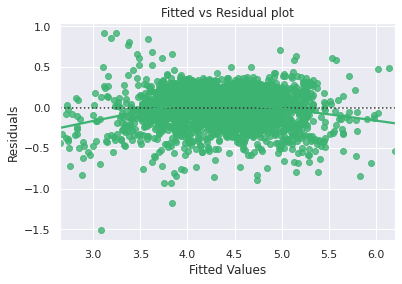

In [ ]:
# let's plot the fitted values vs residuals

sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="mediumseagreen", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* We see no pattern in the plot above. 

**Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

- We will test for normality by checking the distribution of residuals, checking the Q-Q plot of residuals, and by using the Shapiro-Wilk test.

- The shape of the histogram of residuals can give an initial idea about the normality.

- It can also be checked via a Q-Q plot of residuals. If the residuals follow a normal distribution, they will make a straight-line plot, otherwise not.

- Other tests to check for normality include the Shapiro-Wilk test.

    **Null hypothesis:** Residuals are normally distributed

    **Alternate hypothesis:** Residuals are not normally distributed
    
We can apply transformations like log, exponential, arcsinh, etc. as per our data.

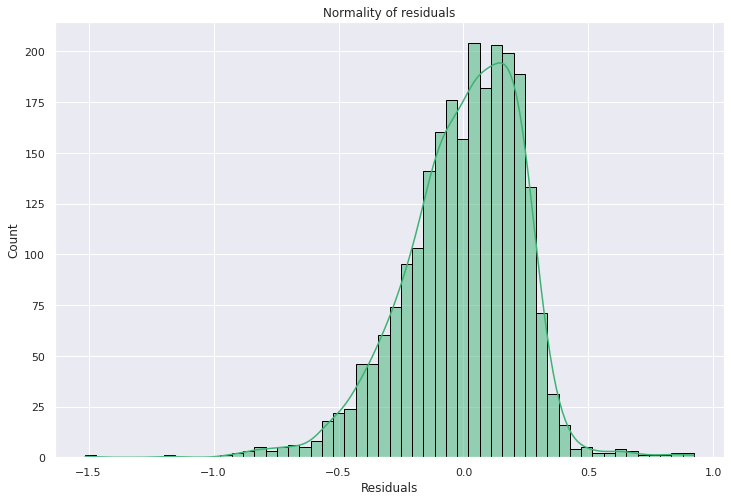

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(data=df_pred, x="Residuals", kde=True, color='mediumseagreen',edgecolor="black")
plt.title("Normality of residuals")
plt.show()

- The histogram of residuals does have a bell shape.
- Let's check the Q-Q plot.

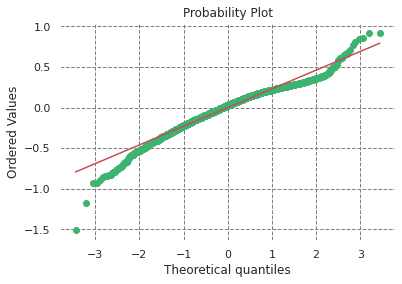

In [ ]:
import pylab
import scipy.stats as stats
plt.grid(color='gray', linestyle='--', linewidth=1)
stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
# Set the plot background color
plt.gca().set_facecolor('white')

# Set the color of the data points
plt.gca().get_lines()[0].set_color('mediumseagreen')
plt.show()

- The residuals more or less follow a straight line except for the tails.
- Let's check the results of the Shapiro-Wilk test.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9676972031593323, pvalue=6.995261942370773e-23)

- Since the p-value < 0.05, the residuals are not normal as per the Shapiro-Wilk test.
- Strictly speaking, the residuals are not normal.
- However, as an approximation, we can accept this distribution as close to being normal.

**Hence, the assumption of the Test for Normality is satisfied.**

### TEST FOR HOMOSCEDASTICITY

* The residual vs fitted values plot can be looked at to check for homoscedasticity. In the case of heteroscedasticity, the residuals can form an arrow shape or any other non-symmetrical shape.
* The goldfeldquandt test can also be used. If we get a p-value > 0.05 we can say that the residuals are homoscedastic. Otherwise, they are heteroscedastic.

   **Null hypothesis:** Residuals are homoscedastic

  **Alternate hypothesis**: Residuals have heteroscedasticity

* Heteroscedasticity can be fixed by adding other important features or making transformations.

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train3)
lzip(name, test)

[('F statistic', 1.0087504199106758), ('p-value', 0.4401970650667301)]

Since the p-value is> 0.05, we can say that the residuals are homoscedastic.

**Hence, the assumption of the test for homoscedasticity is satisfied.**

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction.

In [ ]:
# predictions on the test set
pred_test = olsmod2.predict(x_test3)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred_test})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
1995,4.566741,4.385671
2341,3.696103,4.003934
1913,3.592093,3.643812
688,4.306495,4.103463
650,4.522115,5.113026
2291,4.259294,4.398406
40,4.997685,5.459871
1884,3.875359,4.053143
2538,4.206631,4.035868
45,5.380450,5.227899


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable on Test Data

In [ ]:
# predictions on the train set
pred_train = olsmod2.predict(x_train3)
df_pred_train = pd.DataFrame({"Actual": y_train, "Predicted": pred_train})
df_pred_train.sample(10, random_state=1)

,Actual,Predicted
448,4.094345,3.998149
2129,4.839768,4.784617
2921,5.399836,5.239427
2133,4.966614,4.945631
3011,3.977811,3.930186
2574,4.145038,3.372055
2948,4.424367,4.489429
3103,4.240751,4.170908
1905,3.898532,4.130946
832,3.798406,3.901489


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable on Train Data

## Final Model

Let's recreate the final model and print it's summary to gain insights.

In [ ]:
x_train_final = x_train3.copy()
x_test_final = x_test3.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                              OLS Regression Results                             
Dep. Variable:     normalized_used_price   R-squared:                       0.839
Model:                               OLS   Adj. R-squared:                  0.838
Method:                    Least Squares   F-statistic:                     895.7
Date:                   Sun, 26 Mar 2023   Prob (F-statistic):               0.00
Time:                           15:51:07   Log-Likelihood:                 80.645
No. Observations:                   2417   AIC:                            -131.3
Df Residuals:                       2402   BIC:                            -44.44
Df Model:                             14                                         
Covariance Type:               nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
co

In [ ]:
import plotly
plotly.offline.init_notebook_mode(connected=True)

In [ ]:
import plotly.express as px
import pandas as pd

# Create a scatter plot of actual vs Predicted values
fig = px.scatter(df_pred_test, x='Actual', y='Predicted', opacity=0.7, trendline='ols',
                 trendline_color_override='greenyellow', color_discrete_sequence=['green'])
fig.update_layout(title='Actual vs Predicted Values for Test Data', xaxis_title='Actual', yaxis_title='Predicted',
                  width=1000, height=600)


# Display the plot in the notebook
fig.show()


In [ ]:
# Create a scatter plot of actual vs Predicted values
import plotly.express as px
import pandas as pd


fig = px.scatter(df_pred_train, x='Actual', y='Predicted', opacity=0.7, trendline='ols',
                 trendline_color_override='yellow', color_discrete_sequence=['goldenrod'])
fig.update_layout(title='Actual vs Predicted Values for Train Data', xaxis_title='Actual', yaxis_title='Predicted',
                  width=1000, height=600)

fig.show()


In [ ]:
import plotly.express as px
import pandas as pd
import plotly.graph_objs as go 

# Get the actual and fitted values from the OLS model for both train and test data
y_train_pred = olsmodel_final.predict(x_train_final)
actual_vs_fitted_train = pd.DataFrame({'Actual': y_train, 'Fitted': y_train_pred, 'Data': 'train'})
y_test_pred = olsmodel_final.predict(x_test_final)
actual_vs_fitted_test = pd.DataFrame({'Actual': y_test, 'Fitted': y_test_pred, 'Data': 'test'})

# Concatenate the train and test data frames
actual_vs_fitted = pd.concat([actual_vs_fitted_train, actual_vs_fitted_test])

# Create a scatter plot with different markers for train and test data
fig = px.scatter(actual_vs_fitted, x='Actual', y='Fitted', opacity=0.7, color='Data', symbol='Data', 
                 color_discrete_map={'train': 'goldenrod', 'test': 'green'},
                 symbol_map={'train': 'circle', 'test': 'square'},
                 trendline='ols',
                 trendline_color_override='royalblue')

fig.update_layout(title='Actual vs Fitted Values', xaxis_title='Actual', yaxis_title='Fitted',
                  width=1000, height=600)

fig.show()


In [ ]:
plotly.io.renderers.default = 'colab'

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.23403,0.182751,0.83924,0.838235,4.395407


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.241434,0.186649,0.838387,0.836013,4.556349


**Observations**

**RMSE:** The RMSE of train and test data is low and comparable and indicates a better fit of the model to the training data.

**MAE:** MAE of the train and test data is low ,comparable and indicates the models are not overfitting.MAE is often used in situations where outliers or extreme values in the data may significantly affect the performance of the model.

MAE suggests that the model can predict the price of used/refurbished phones and tablets within a mean error of 0.1866 on the test data.

**MAPE:**
MAPE is often used in situations where the scale of the dependent variable is significant, and it is important to measure the accuracy of the model in percentage terms. 

MAPE of 4.6 on the test data means that the model's predicted prices are off by ~4.6% from the actual prices of the used phones in the test data.

**R-square and Adjusted R-square:**
The R-Square and Adjusted R-square of Train and Test data are comparable indicating the model is performing better on test and train data.

A high R-squared value of 0.838 on the test data means that the model explains 84.25% of the variance in the dependent variable.

**Hence, we can conclude the model olsmodel_final is good for prediction as well as inference purposes**

**Equation for Linear Regression**

In [ ]:
# Let us write the equation of linear regression
Equation = "normalized_used_price ="
print(Equation, end=" ")
for i in range(len(x_train_final.columns)):
    if i == 0:
        print(olsmodel_final.params[i], "+", end=" ")
    elif i != len(x_train_final.columns) - 1:
        print(
            olsmodel_final.params[i],
            "* (",
            x_train_final.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmodel_final.params[i], "* (", x_train_final.columns[i], ")")

normalized_used_price = 1.4999812451972678 + 0.020967228790752777 * ( main_camera_mp ) +  0.013827288876828842 * ( selfie_camera_mp ) +  0.02071270165714738 * ( ram ) +  0.0016616476692227972 * ( weight ) +  0.4414723002236377 * ( normalized_new_price ) +  -0.02916976367153913 * ( years_since_release ) +  0.11559844506476558 * ( brand_name_Karbonn ) +  -0.03742329934072872 * ( brand_name_Samsung ) +  -0.06699285130111633 * ( brand_name_Sony ) +  0.08006840695804293 * ( brand_name_Xiaomi ) +  -0.1275751256189785 * ( os_Others ) +  -0.09000552317649085 * ( os_iOS ) +  0.050213451529782495 * ( 4g_yes ) +  -0.06725868426972234 * ( 5g_yes )


## Actionable Insights and Recommendations 

**Observations:**

- The model can account for approximately 84% of the variability in the data and predict the price of a used phone/tablet on the test data within 4.6%, which is considered good. This suggests that the model is suitable for both inference and prediction purposes.

- A one-unit increase in the main camera resolution (MP) of a phone/tablet leads to a 0.0210 unit increase in its used price, holding all other variables constant. As rear cameras generally have better resolutions than front cameras.

- A one-unit increase in the selfie camera resolution (MP) of a phone/tablet results in a 0.0138 unit increase in its used price, holding all other variables constant. With many devices now offering great selfie cameras.

- A one-unit increase in the RAM of a phone/tablet leads to a 0.0207 unit increase in its used price, holding all other variables constant. 

- A one-unit increase in the weight of a phone/tablet results in a 0.0017 unit increase in its used price, holding all other variables constant. 

- A one-unit increase in the price of a new phone/tablet leads to a 0.4415 unit increase in its used price, holding all other variables constant.

- A one-unit increase in the number of years since a phone/tablet was released leads to a 0.0292 unit decrease in its used price, holding all other variables constant. 

- The used price of a phone/tablet for the Karbonn brand is predicted to be 11.56% higher than the base brand, holding all other variables constant. 
- The used price of a phone/tablet for the Samsung brand is predicted to be 3.74% lower than the base brand, holding all other variables constant. 
- The used price of a phone/tablet for the Sony brand is predicted to be 6.70% lower than the base brand, holding all other variables constant. 
- The used price of a phone/tablet for the Xiaomi brand is predicted to be 8.01% higher than the base brand, holding all other variables constant. 

- The positive coefficient for 4g_yes suggests that a phone with 4G capability is associated with a higher price for a used phone, compared to a phone without 4G capability, which is the base category.

- The negative coefficient for 5g_yes suggests that a phone with 5G capability is associated with a lower price for a used phone, compared to a phone without 5G capability, which is the base category. However, it's important to note that this negative coefficient could be due to the fact that 5G technology is relatively new and not yet widely adopted, so phones with 5G capability may not be in as high demand yet as phones with 4G capability.

**Recommendations:**

*  The equation provided allows us to predict the normalized used price of any device based on its features. By inputting these feature values, we can determine whether a device is overpriced or underpriced and adjust pricing accordingly to improve business.

*   Several device features significantly influence the normalized used price, including rear and front camera resolution, RAM, and weight. Devices with higher resolution cameras, more RAM, and lower weight tend to have higher prices.

*  The normalized new price of a device also plays a role in determining its used price. Devices with higher original prices tend to have higher used prices.

*  Support for 4G tends to increase the normalized used price, while support for 5G tends to decrease it. This is likely due to the fact that 4G is more established and widely-used, making 4G devices more desirable to buyers and therefore increasing their resale value.

*   Brand and operating system also impact the price of a device, with some brands and operating systems having higher values than others.

*   Finally, the years since release of a device negatively impacts the normalized used price. As a device ages, its value decreases, making newer devices more desirable and valuable. Recell's business strategy should include a mix of new and used devices to appeal to buyers with varying preferences.





___